# Data Analytics and Visulisation Assignment 2

# Thomas Flynn - R00242398

# Load neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, fbeta_score, roc_auc_score,
    balanced_accuracy_score, matthews_corrcoef, confusion_matrix, classification_report,ConfusionMatrixDisplay
)
from collections import Counter
from sklearn.metrics import make_scorer
from tqdm.auto import tqdm
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
import pingouin as pg
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from math import ceil
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
# Set options and ignore warnings
pd.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

# Loading in dataset

- **Loading in Training Dataset**

In [2]:
def load_and_view_dataset(file_path):
    # Loading in the dataset using Pandas
    dataset = pd.read_excel(file_path)

    # printing the shape of the dataset
    print(dataset.shape)

    # printing the column headings
    print(dataset.columns.tolist())

    # displaying the first few rows of the dataset
    display(dataset.head())  

    # displaying the last few rows of the dataset
    display(dataset.tail())
    
    return dataset

# setting file path
file_path = "C:/Users/Thomas/Downloads/Data Science Semester 1 Modules/Data Science All Modules/Stats and Prob/Semester 2 Data Science/Data Analytics & Visualisation/RF_TrainingDatasetA_Final-1.xlsx"
#loading and viewing the dataset
data = load_and_view_dataset(file_path)

(2186, 79)
['RFDBid', 'Eng_Class', 'Antennafilename1', 'Antennafilename2', 'AntennagaindBd1', 'AntennagaindBd2', 'AntennagaindBi1', 'AntennagaindBi2', 'Antennaheightm1', 'Antennaheightm2', 'Antennamodel1', 'Antennamodel2', 'AtmosphericabsorptionlossdB', 'AverageannualtemperatureC', 'CirculatorbranchinglossdB1', 'CirculatorbranchinglossdB2', 'dbperKmRatio', 'DiffractionlossdB', 'DispersivefademargindB1', 'DispersivefademargindB2', 'Dispersivefadeoccurrencefactor', 'EffectiveFadeMargindB1', 'EffectiveFadeMargindB2', 'EIRPdBm1', 'EIRPdBm2', 'Elevation2', 'Elevationm1', 'Emissiondesignator1', 'Emissiondesignator2', 'ERPdbm1', 'ERPdbm2', 'ERPwatts1', 'ERPwatts2', 'FadeoccurrencefactorPo', 'FlatfademarginmultipathdB1', 'FlatfademarginmultipathdB2', 'FreespacelossdB', 'FrequencyMHz', 'Geoclimaticfactor', 'MainnetpathlossdB1', 'MainnetpathlossdB2', 'MainreceivesignaldBm1', 'MainreceivesignaldBm2', 'MiscellaneouslossdB1', 'MiscellaneouslossdB2', 'OtherRXlossdB1', 'OtherRXlossdB2', 'OtherTXlossd

RFDBid Eng_Class Antennafilename1 Antennafilename2  AntennagaindBd1  \
0  id_11      okay             7049             7049             39.9   
1  id_38      okay             7004             7004             33.7   
2  id_40      okay             7004             7004             33.7   
3  id_43     under             7004             7049             33.7   
4  id_44      okay             7004             7004             33.7   

   AntennagaindBd2  AntennagaindBi1  AntennagaindBi2  Antennaheightm1  \
0             39.9             42.0             42.0             30.0   
1             33.7             35.8             35.8             30.0   
2             33.7             35.8             35.8             30.0   
3             39.9             35.8             42.0             30.0   
4             33.7             35.8             35.8             30.0   

   Antennaheightm2        Antennamodel1        Antennamodel2  \
0             60.0  VHLP4-13 7049B (TR)  VHLP4-13 7049B (TR)   
1             30.0   VHLP2-13 7004 (TR)   VHLP2-13 7004 (TR)   
2             30.0   VHLP2-13 7004 (TR)   VHLP2-13 7004 (TR)   
3             30.0   VHLP2-13 7004 (TR)  VHLP4-13 7049B (TR)   
4             30.0   VHLP2-13 7004 (TR)   VHLP2-13 7004 (TR)   

   AtmosphericabsorptionlossdB  AverageannualtemperatureC  \
0                          0.6                        8.6   
1                          0.3                        9.0   
2                          0.3                        9.5   
3                          0.6                        9.9   
4                          0.3                        9.2   

   CirculatorbranchinglossdB1  CirculatorbranchinglossdB2  dbperKmRatio  \
0                         0.0                         0.0           1.1   
1                         0.0                         0.0           2.3   
2                         0.0                         0.0           2.1   
3                         0.0                         0.0           1.1   
4                         0.0                         0.0           1.8   

   DiffractionlossdB  DispersivefademargindB1  DispersivefademargindB2  \
0                0.0                      0.0                      0.0   
1                0.0                      0.0                      0.0   
2                0.0                      0.0                      0.0   
3                0.0                      0.0                      0.0   
4                0.0                      0.0                      0.0   

   Dispersivefadeoccurrencefactor  EffectiveFadeMargindB1  \
0                               1                    34.3   
1                               1                    28.8   
2                               1                    28.2   
3                               1                    31.3   
4                               1                    27.1   

   EffectiveFadeMargindB2  EIRPdBm1  EIRPdBm2  Elevation2  Elevationm1  \
0                    34.3      58.5      58.5       290.3        285.5   
1                    28.8      50.9      50.9        17.8        290.0   
2                    28.2      50.9      50.9       283.5        373.5   
3                    35.2      58.8      61.1       413.1         27.1   
4                    27.1      50.9      50.9        40.0         89.7   

  Emissiondesignator1 Emissiondesignator2  ERPdbm1  ERPdbm2  ERPwatts1  \
0             28M6G7W             28M6G7W     58.5     58.5      708.0   
1          28M00D7WET          28M00D7WET     50.9     50.9      123.0   
2          28M00D7WET          28M00D7WET     50.9     50.9      123.0   
3          28M00D7WET          28M00D7WET     58.8     61.1      758.6   
4          28M00D7WET          28M00D7WET     50.9     50.9      123.0   

   ERPwatts2  FadeoccurrencefactorPo  FlatfademarginmultipathdB1  \
0      708.0                     0.1                        34.3   
1      123.0                     0.0                        28.8   
2      123.0   

RFDBid Eng_Class Antennafilename1 Antennafilename2  AntennagaindBd1  \
2181  id_3103      okay             7030             7030             38.0   
2182  id_3182      okay             7030             7030             38.0   
2183  id_3183     under             7030             7030             38.0   
2184  id_3184      okay             7030             7030             38.0   
2185  id_3194     under             7030             7030             38.0   

      AntennagaindBd2  AntennagaindBi1  AntennagaindBi2  Antennaheightm1  \
2181             38.0             40.1             40.1             30.0   
2182             38.0             40.1             40.1             30.0   
2183             38.0             40.1             40.1             30.0   
2184             38.0             40.1             40.1             30.0   
2185             38.0             40.1             40.1             30.0   

      Antennaheightm2       Antennamodel1       Antennamodel2  \
2181             30.0  VHLP1-38 7030 (TR)  VHLP1-38 7030 (TR)   
2182             30.0  VHLP1-38 7030 (TR)  VHLP1-38 7030 (TR)   
2183             30.0  VHLP1-38 7030 (TR)  VHLP1-38 7030 (TR)   
2184             30.0  VHLP1-38 7030 (TR)  VHLP1-38 7030 (TR)   
2185             30.0       VHLP1-38 (TR)       VHLP1-38 (TR)   

      AtmosphericabsorptionlossdB  AverageannualtemperatureC  \
2181                          0.1                        9.7   
2182                          0.5                       10.0   
2183                          0.1                        9.7   
2184                          0.0                        9.7   
2185                          0.2                        9.7   

      CirculatorbranchinglossdB1  CirculatorbranchinglossdB2  dbperKmRatio  \
2181                         0.0                         0.0          47.6   
2182                         0.0                         0.0           7.6   
2183                         0.0                         0.0          33.2   
2184                         0.0                         0.0         197.5   
2185                         0.0                         0.0          10.5   

      DiffractionlossdB  DispersivefademargindB1  DispersivefademargindB2  \
2181                0.0                      0.0                      0.0   
2182                0.0                      0.0                      0.0   
2183                0.0                      0.0                      0.0   
2184                0.0                      0.0                      0.0   
2185                0.0                      0.0                      0.0   

      Dispersivefadeoccurrencefactor  EffectiveFadeMargindB1  \
2181                               1                    32.9   
2182                               1                    30.6   
2183                               1                    17.6   
2184                               1                    45.4   
2185                               1                    14.1   

      EffectiveFadeMargindB2  EIRPdBm1  EIRPdBm2  Elevation2  Elevationm1  \
2181                    32.9      37.1      37.1        53.0         60.6   
2182                    30.6      47.1      47.1       151.5         31.8   
2183                    17.6      16.1      16.1         9.4         13.0   
2184                    44.9      30.1      30.6         8.8          3.1   
2185                    14.1      39.1      39.1        63.0         59.0   

     Emissiondesignator1 Emissiondesignator2  ERPdbm1  ERPdbm2  ERPwatts1  \
2181          28M00D7WET          28M00D7WET     37.1     37.1        5.1   
2182             14M2G7W             14M2G7W     47.1     47.1       51.3   
2183             14M2G7W             14M2G7W     16.1     16.1        0.0   
2184             3M70G7W             3M70G7W     30.1     30.6        1.0   
2185          56M00D7WET          56M00D7WET     39.1     39.1        8.1   

      ERPwatts2  FadeoccurrencefactorPo  Flatfademarginmultipa

- **Loading in the Scoring Dataset**

In [3]:
# setting file path
file_path = "C:/Users/Thomas/Downloads/Data Science Semester 1 Modules/Data Science All Modules/Stats and Prob/Semester 2 Data Science/Data Analytics & Visualisation/RF_ScoringDatasetA_Final-1.xlsx"
#loading and viewing the dataset
data_test = load_and_view_dataset(file_path)

(936, 77)
['RFDBid', 'Antennafilename1', 'Antennafilename2', 'AntennagaindBd1', 'AntennagaindBd2', 'AntennagaindBi1', 'AntennagaindBi2', 'Antennaheightm1', 'Antennaheightm2', 'Antennamodel1', 'Antennamodel2', 'AtmosphericabsorptionlossdB', 'AverageannualtemperatureC', 'CirculatorbranchinglossdB1', 'CirculatorbranchinglossdB2', 'dbperKmRatio', 'DiffractionlossdB', 'DispersivefademargindB1', 'DispersivefademargindB2', 'Dispersivefadeoccurrencefactor', 'EffectivefademargindB1', 'EffectivefademargindB2', 'EIRPdBm1', 'EIRPdBm2', 'Elevation2', 'Elevationm1', 'Emissiondesignator1', 'Emissiondesignator2', 'ERPdbm1', 'ERPdbm2', 'ERPwatts1', 'ERPwatts2', 'FadeoccurrencefactorPo', 'FlatfademarginmultipathdB1', 'FlatfademarginmultipathdB2', 'FreespacelossdB', 'FrequencyMHz', 'Geoclimaticfactor', 'MainnetpathlossdB1', 'MainnetpathlossdB2', 'MainreceivesignaldBm1', 'MainreceivesignaldBm2', 'MiscellaneouslossdB1', 'MiscellaneouslossdB2', 'OtherRXlossdB1', 'OtherRXlossdB2', 'OtherTXlossdB1', 'OtherTXl

RFDBid Antennafilename1 Antennafilename2  AntennagaindBd1  AntennagaindBd2  \
0  id_15           7004.0           7004.0            33.65            33.65   
1  id_27           7005.0           7005.0            33.65            33.65   
2  id_39           7004.0           7004.0            33.65            33.65   
3  id_41           7004.0           7004.0            33.65            33.65   
4  id_42           7004.0           7004.0            33.65            33.65   

   AntennagaindBi1  AntennagaindBi2  Antennaheightm1  Antennaheightm2  \
0             35.8             35.8             30.0             30.0   
1             35.8             35.8             30.0             30.0   
2             35.8             35.8             30.0             30.0   
3             35.8             35.8             30.0             30.0   
4             35.8             35.8             30.0             30.0   

        Antennamodel1       Antennamodel2  AtmosphericabsorptionlossdB  \
0       VHLP2-13 (TR)       VHLP2-13 (TR)                         0.47   
1      VHLPX2-13 (TR)      VHLPX2-13 (TR)                         0.23   
2  VHLP2-13 7004 (TR)  VHLP2-13 7004 (TR)                         0.37   
3  VHLP2-13 7004 (TR)  VHLP2-13 7004 (TR)                         0.41   
4  VHLP2-13 7004 (TR)  VHLP2-13 7004 (TR)                         0.25   

   AverageannualtemperatureC  CirculatorbranchinglossdB1  \
0                       9.07                         0.0   
1                       8.84                         0.0   
2                       9.48                         0.0   
3                       9.31                         0.0   
4                       9.37                         0.0   

   CirculatorbranchinglossdB2  dbperKmRatio  DiffractionlossdB  \
0                         0.0      0.943281                0.0   
1                         0.0      1.347258                0.0   
2                         0.0      1.388675                0.0   
3                         0.0      1.394698                0.0   
4                         0.0      2.348214                0.0   

   DispersivefademargindB1  DispersivefademargindB2  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      0.0                      0.0   
4                      0.0                      0.0   

   Dispersivefadeoccurrencefactor  EffectivefademargindB1  \
0                               1                   21.62   
1                               1                   15.48   
2                               1                   25.26   
3                               1                   28.41   
4                               1                   28.93   

   EffectivefademargindB2  EIRPdBm1  EIRPdBm2  Elevation2  Elevationm1  \
0                   21.62      51.8      51.8       10.90       281.42   
1                   15.48      51.3      51.3      302.00       129.00   
2                   25.26      50.8      50.8       56.00       373.52   
3                   28.41      54.9      54.9      300.24       197.44   
4                   28.93      50.9      50.9      192.66       197.44   

  Emissiondesignator1 Emissiondesignator2  ERPdbm1  ERPdbm2  ERPwatts1  \
0          56M00D7WET          56M00D7WET     51.8     51.8     151.36   
1          56M00D7WET          56M00D7WET     51.3     51.3     134.90   
2          28M00D7WET          28M00D7WET     50.8     50.8     120.23   
3          28M00D7WET          28M00D7WET     54.9     54.9     309.03   
4          28M00D7WET          28M00D7WET     50.9     50.9     123.03   

   ERPwatts2  FadeoccurrencefactorPo  FlatfademarginmultipathdB1  \
0     151.36                0.002444                       21.62   
1     134.90                0.000065                       15.48   
2     120.23                0.000681                       25.26   
3     309.03       

RFDBid Antennafilename1 Antennafilename2  AntennagaindBd1  \
931  id_3003           7030.0           7030.0            37.95   
932  id_3101           7030.0           7030.0            37.95   
933  id_3104           7030.0           7030.0            37.95   
934  id_3105           7030.0           7030.0            37.95   
935  id_3197           7030.0           7030.0            37.95   

     AntennagaindBd2  AntennagaindBi1  AntennagaindBi2  Antennaheightm1  \
931            37.95             40.1             40.1             30.0   
932            37.95             40.1             40.1             30.0   
933            37.95             40.1             40.1             30.0   
934            37.95             40.1             40.1             30.0   
935            37.95             40.1             40.1             30.0   

     Antennaheightm2       Antennamodel1       Antennamodel2  \
931             30.0  VHLP1-38 7030 (TR)  VHLP1-38 7030 (TR)   
932             30.0  VHLP1-38 7030 (TR)  VHLP1-38 7030 (TR)   
933             30.0  VHLP1-38 7030 (TR)  VHLP1-38 7030 (TR)   
934             30.0  VHLP1-38 7030 (TR)  VHLP1-38 7030 (TR)   
935             30.0       VHLP1-38 (TR)       VHLP1-38 (TR)   

     AtmosphericabsorptionlossdB  AverageannualtemperatureC  \
931                         0.15                       9.69   
932                         0.16                       9.70   
933                         0.22                       9.22   
934                         0.26                      10.04   
935                         0.26                       8.96   

     CirculatorbranchinglossdB1  CirculatorbranchinglossdB2  dbperKmRatio  \
931                         0.0                         0.0     13.179688   
932                         0.0                         0.0     20.915385   
933                         0.0                         0.0     13.130435   
934                         0.0                         0.0     10.376147   
935                         0.0                         0.0      9.769953   

     DiffractionlossdB  DispersivefademargindB1  DispersivefademargindB2  \
931                0.0                      0.0                      0.0   
932                0.0                      0.0                      0.0   
933                0.0                      0.0                      0.0   
934                0.0                      0.0                      0.0   
935                0.0                      0.0                      0.0   

     Dispersivefadeoccurrencefactor  EffectivefademargindB1  \
931                               1                   16.87   
932                               1                   27.19   
933                               1                   24.16   
934                               1                   22.62   
935                               1                   20.81   

     EffectivefademargindB2  EIRPdBm1  EIRPdBm2  Elevation2  Elevationm1  \
931                   16.87      23.1      23.1        5.00         8.92   
932                   27.19      37.1      37.1       28.00        33.88   
933                   24.16      37.1      37.1       45.40        49.56   
934                   22.62      37.1      37.1       21.45        16.58   
935                   20.81      49.1      49.1       48.76        19.72   

    Emissiondesignator1 Emissiondesignator2  ERPdbm1  ERPdbm2  ERPwatts1  \
931             14M2G7W             14M2G7W     23.1     23.1       0.20   
932          28M00D7WET          28M00D7WET     37.1     37.1       5.13   
933          28M00D7WET          28M00D7WET     37.1     37.1       5.13   
934          28M00D7WET          28M00D7WET     37.1     37.1       5.13   
935          56M00D7WET          56M00D7WET     49.1     49.1      81.28   

     ERPwatts2  FadeoccurrencefactorPo  FlatfademarginmultipathdB1  \
931       0.20            1.045000e-06                       16.87   
932       5.13            7.395000e

# EDA

- **Getting basic information on both datasets**

In [4]:
def view_dataset_details(dataset):
    # getting the basic info about the dataset 
    display(dataset.info())
    # getting descriptive statistics for each column
    display(dataset.describe())
#viewing dataset details 
view_dataset_details(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RFDBid                          2186 non-null   object 
 1   Eng_Class                       2186 non-null   object 
 2   Antennafilename1                2186 non-null   object 
 3   Antennafilename2                2186 non-null   object 
 4   AntennagaindBd1                 2186 non-null   float64
 5   AntennagaindBd2                 2186 non-null   float64
 6   AntennagaindBi1                 2186 non-null   float64
 7   AntennagaindBi2                 2186 non-null   float64
 8   Antennaheightm1                 2186 non-null   float64
 9   Antennaheightm2                 2186 non-null   float64
 10  Antennamodel1                   2186 non-null   object 
 11  Antennamodel2                   2186 non-null   object 
 12  AtmosphericabsorptionlossdB     21

None

AntennagaindBd1  AntennagaindBd2  AntennagaindBi1  AntennagaindBi2  \
count      2186.000000      2186.000000      2186.000000      2186.000000   
mean         35.956816        35.845288        38.049909        37.938381   
std           2.372291         2.308034         2.372978         2.308406   
min          28.800000        28.800000        30.900000        30.900000   
25%          34.500000        34.500000        36.600000        36.600000   
50%          34.700000        34.500000        36.800000        36.600000   
75%          38.000000        38.000000        40.100000        40.100000   
max          44.600000        44.600000        46.700000        46.700000   

       Antennaheightm1  Antennaheightm2  AtmosphericabsorptionlossdB  \
count      2186.000000      2186.000000                  2186.000000   
mean         29.745929        29.487420                     0.588655   
std          11.001432         7.190387                     0.529063   
min           5.000000         5.000000                     0.000000   
25%          30.000000        30.000000                     0.200000   
50%          30.000000        30.000000                     0.400000   
75%          30.000000        30.000000                     0.800000   
max         210.000000       206.100000                     3.900000   

       AverageannualtemperatureC  CirculatorbranchinglossdB1  \
count                2186.000000                 2186.000000   
mean                    9.422873                    0.006587   
std                     0.602123                    0.154424   
min                     0.300000                    0.000000   
25%                     9.000000                    0.000000   
50%                     9.500000                    0.000000   
75%                     9.700000                    0.000000   
max                    11.000000                    3.900000   

       CirculatorbranchinglossdB2  dbperKmRatio  DiffractionlossdB  \
count                 2186.000000   2186.000000        2186.000000   
mean                     0.006587     17.469396           0.133211   
std                      0.154424     36.378310           1.006484   
min                      0.000000      0.000000           0.000000   
25%                      0.000000      2.000000           0.000000   
50%                      0.000000      4.300000           0.000000   
75%                      0.000000     15.175000           0.000000   
max                      3.900000    368.900000          18.900000   

       DispersivefademargindB1  DispersivefademargindB2  \
count              2186.000000              2186.000000   
mean                  0.106542                 0.106542   
std                   2.282345                 2.282345   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                  67.700000                67.700000   

       Dispersivefadeoccurrencefactor  EffectiveFadeMargindB1  \
count                          2186.0             2186.000000   
mean                              1.0               26.434538   
std                               0.0                8.263969   
min                               1.0                0.300000   
25%                               1.0               20.800000   
50%                               1.0               25.600000   
75%                               1.0               31.400000   
max                               1.0               63.200000   

       EffectiveFadeMargindB2     EIRPdBm1     EIRPdBm2   Elevation2  \
count             2186.000000  2186.000000  2186.000000  2186.000000   
mean                26.451281    44.560704    44.427813    89.750503   
std                  8.280674     9.041225     8.929917    99.814335   
min                  0.300000     4.100000     4.1

In [5]:
# doing the same for scoring dataset
view_dataset_details(data_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RFDBid                          936 non-null    object 
 1   Antennafilename1                936 non-null    object 
 2   Antennafilename2                936 non-null    object 
 3   AntennagaindBd1                 936 non-null    float64
 4   AntennagaindBd2                 936 non-null    float64
 5   AntennagaindBi1                 936 non-null    float64
 6   AntennagaindBi2                 936 non-null    float64
 7   Antennaheightm1                 936 non-null    float64
 8   Antennaheightm2                 936 non-null    float64
 9   Antennamodel1                   936 non-null    object 
 10  Antennamodel2                   936 non-null    object 
 11  AtmosphericabsorptionlossdB     936 non-null    float64
 12  AverageannualtemperatureC       936 

None

AntennagaindBd1  AntennagaindBd2  AntennagaindBi1  AntennagaindBi2  \
count        936.00000       936.000000       936.000000       936.000000   
mean          36.00406        35.874359        38.162927        38.028419   
std            2.37545         2.353622         2.372571         2.354439   
min           29.95000        28.750000        32.100000        30.900000   
25%           34.45000        34.450000        36.600000        36.600000   
50%           34.65000        34.650000        36.800000        36.800000   
75%           37.95000        37.950000        40.100000        40.100000   
max           43.05000        43.050000        45.200000        45.200000   

       Antennaheightm1  Antennaheightm2  AtmosphericabsorptionlossdB  \
count       936.000000       936.000000                   936.000000   
mean         29.461506        29.642521                     0.631645   
std           4.958675         7.625113                     0.626476   
min           5.000000         5.000000                     0.010000   
25%          30.000000        30.000000                     0.220000   
50%          30.000000        30.000000                     0.450000   
75%          30.000000        30.000000                     0.810000   
max          60.000000       150.000000                     4.490000   

       AverageannualtemperatureC  CirculatorbranchinglossdB1  \
count                 936.000000                  936.000000   
mean                    9.432169                    0.009402   
std                     0.609520                    0.171428   
min                     1.070000                    0.000000   
25%                     9.030000                    0.000000   
50%                     9.530000                    0.000000   
75%                     9.712500                    0.000000   
max                    10.990000                    3.900000   

       CirculatorbranchinglossdB2  dbperKmRatio  DiffractionlossdB  \
count                  936.000000    936.000000         936.000000   
mean                     0.009402     17.721350           0.106517   
std                      0.171428     36.941880           0.720228   
min                      0.000000      0.344772           0.000000   
25%                      0.000000      2.039335           0.000000   
50%                      0.000000      4.175045           0.000000   
75%                      0.000000     13.853220           0.000000   
max                      3.900000    407.500000          10.170000   

       DispersivefademargindB1  DispersivefademargindB2  \
count               936.000000               936.000000   
mean                  0.050427                 0.050427   
std                   1.542780                 1.542780   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                  47.200000                47.200000   

       Dispersivefadeoccurrencefactor  EffectivefademargindB1  \
count                           936.0              936.000000   
mean                              1.0               26.681987   
std                               0.0                7.948223   
min                               1.0                6.760000   
25%                               1.0               21.187500   
50%                               1.0               25.460000   
75%                               1.0               31.825000   
max                               1.0               55.290000   

       EffectivefademargindB2    EIRPdBm1    EIRPdBm2  Elevation2  \
count              936.000000  936.000000  936.000000  936.000000   
mean                26.685780   44.883440   44.745139   90.479191   
std                  7.953403    9.063018    8.986692   98.026498   
min                  6.760000   16.100000   16.100000    0.000

- Dropping these columns from both the test set and training set as they are not needed. Outcome is dropped due to data leakage reasons.

In [6]:
# Columns to be dropped
columns_to_drop = ['RFDBid', 'Antennafilename1', 'Antennafilename2', 'Outcome', "Radiofilename1", "Radiofilename2"]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [7]:
# Columns to be dropped
columns_to_drop = ['RFDBid', 'Antennafilename1', 'Antennafilename2', "Radiofilename1", "Radiofilename2"]
data_test.drop(columns=columns_to_drop, axis=1, inplace=True)

- **Getting rid of any missing data and duplicates in both datasets**


In [8]:
def cleaning_dataset(data):
    # detecting any missing data + standardising the treatment of missing data
    missing_values = ["n/a", "na", "--", "?", "-", "None", "none", "NaN"]
    data.replace(missing_values, np.nan, inplace=True)

    #stripping whitespace and replacing empty strings with nan
    data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    data.replace("", np.nan, inplace=True)

    # print counts of NaN 
    nan_counts = data.isnull().sum()
    print("Counts of NaN in each column before handling missing data:")
    print(nan_counts[nan_counts > 0])
    
    
    data.dropna(inplace=True)

    #showing the new shape of the dataset
    print(f"New dataset shape: {data.shape}")
    
    return data

# Cleaning the dataset
data= cleaning_dataset(data)

Counts of NaN in each column before handling missing data:
DpQ_R2     9
Fullmin    6
dtype: int64
New dataset shape: (2173, 73)


In [9]:
data_test= cleaning_dataset(data_test)

Counts of NaN in each column before handling missing data:
Series([], dtype: int64)
New dataset shape: (936, 72)


In [10]:
def remove_duplicates(data):
    # Getting the number of duplicate rows before removing them
    num_duplicates = data.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Removing duplicates
    data.drop_duplicates(inplace=True)

    # Showing the new shape of the dataset after removing duplicates
    print(f"New dataset shape after removing duplicates: {data.shape}")

    return data
data = remove_duplicates(data)

Number of duplicate rows: 0
New dataset shape after removing duplicates: (2173, 73)


In [11]:
data_test = remove_duplicates(data_test)

Number of duplicate rows: 1
New dataset shape after removing duplicates: (935, 72)


- **Looking at the differences and incosistencies between the datasets**

In [12]:
# checking for matching columns
train_columns = set(data.columns) - {'Eng_Class'}
scoring_columns = set(data_test.columns)

# Printing the variables not matching 
print("Columns in training not in scoring:", train_columns - scoring_columns)
print("Columns in scoring not in training:", scoring_columns - train_columns)

Columns in training not in scoring: {'ThermalFadeMargindB2', 'R_Powerfd1', 'EffectiveFadeMargindB2', 'ThermalFadeMargindB1', 'EffectiveFadeMargindB1', 'R_Powerfd2', 'DpQ_R2 '}
Columns in scoring not in training: {'DpQ_R2', 'r_Powerfd1', 'EffectivefademargindB2', 'ThermalfademargindB1', 'r_Powerfd2', 'EffectivefademargindB1', 'ThermalfademargindB2'}


- **Making sure datasets are in the same format**

In [13]:
# Changing column names to lower case
data.columns = [col.lower() for col in data.columns]
data_test.columns = [col.lower() for col in data_test.columns]

In [14]:
# stripping leading and trailing whitespaces
data.columns = [col.strip() for col in data.columns]
data_test.columns = [col.strip() for col in data_test.columns]

In [15]:
# Comparing column names
columns_train = set(data.columns)
columns_test = set(data_test.columns)
print("Columns in training but not in test:", columns_train - columns_test)
print("Columns in test but not in training:", columns_test - columns_train)


Columns in training but not in test: {'eng_class'}
Columns in test but not in training: set()


In [16]:
# Comparing data types
mismatched_dtypes = {col: (data[col].dtype, data_test[col].dtype) 
                     for col in columns_train.intersection(columns_test) 
                     if data[col].dtype != data_test[col].dtype}
print("Columns with different data types across datasets:", mismatched_dtypes)

Columns with different data types across datasets: {'miscellaneouslossdb1': (dtype('float64'), dtype('int64')), 'geoclimaticfactor': (dtype('int64'), dtype('float64')), 'miscellaneouslossdb2': (dtype('float64'), dtype('int64'))}


In [17]:
# Converting these columns to float to ensure consistency
data['geoclimaticfactor'] = data['geoclimaticfactor'].astype(float)

data_test['miscellaneouslossdb1'] = data_test['miscellaneouslossdb1'].astype(float)
data_test['miscellaneouslossdb2'] = data_test['miscellaneouslossdb2'].astype(float)


In [18]:
# Checking for matching columns, excluding the target variable
train_columns = set(data.columns) - {'eng_class'}
scoring_columns = set(data_test.columns)

# printing variables that are not matching between the datasets
print("Columns in training not in scoring:", train_columns - scoring_columns)
print("Columns in scoring not in training:", scoring_columns - train_columns)

Columns in training not in scoring: set()
Columns in scoring not in training: set()


- **Distributions of Variables**

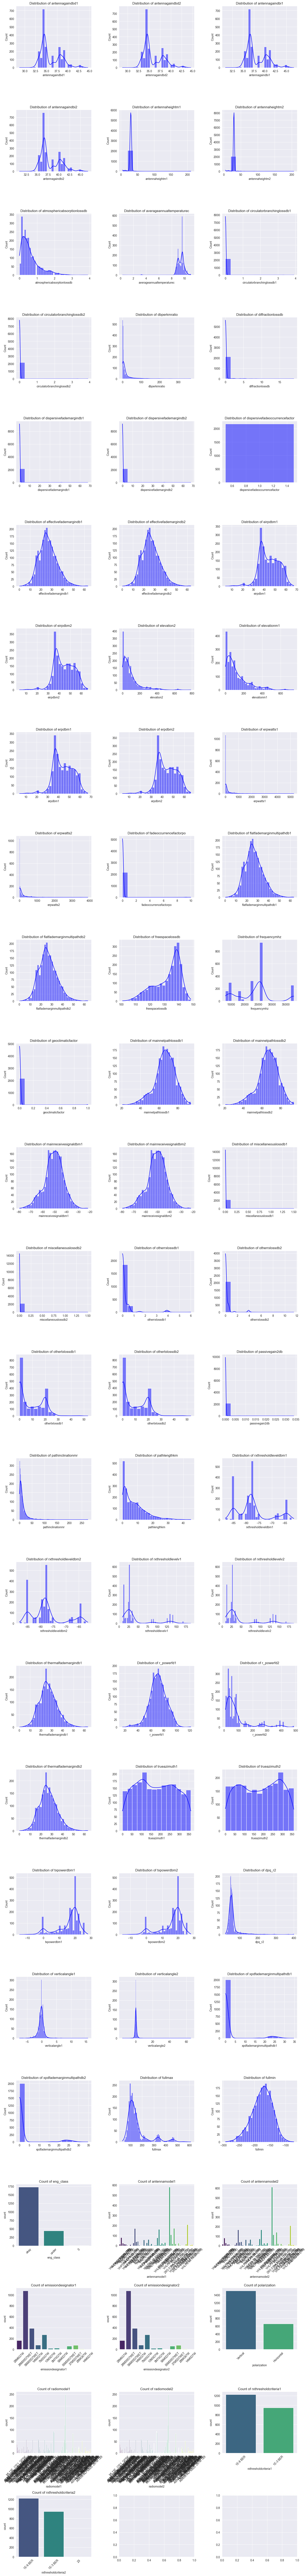

In [19]:


def plot_feature_distributions(dataset):
    
    # visualisation style for plots
    sns.set_style('darkgrid')
    
    # Get numerical and categorical features
    numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = dataset.select_dtypes(include=['object']).columns
    
    # Setting plot size based on number of features
    num_numerical_features = len(numerical_features)
    num_categorical_features = len(categorical_features)
    num_plots = num_numerical_features + num_categorical_features
    
    #number of columns for the subplots
    num_cols = 2 if num_plots % 2 == 0 else 3
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    # Creating the subplots
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))
    
    # Flatten axs if needed
    axs = axs.flat if num_plots > 1 else [axs]
    
    # Plot numerical features
    for i, feature in enumerate(numerical_features):
        sns.histplot(data=data, x=feature, ax=axs[i], kde=True, color='blue')
        axs[i].set_title(f'Distribution of {feature}', fontsize=12)
    
    # Plot categorical features
    for j, feature in enumerate(categorical_features, start=i+1):
        sns.countplot(data=dataset, x=feature, ax=axs[j], palette='viridis')
        axs[j].set_title(f'Count of {feature}', fontsize=12)
        axs[j].tick_params(axis='x', rotation=45)
    

    plt.tight_layout()
    plt.show() #show plots


plot_feature_distributions(data)

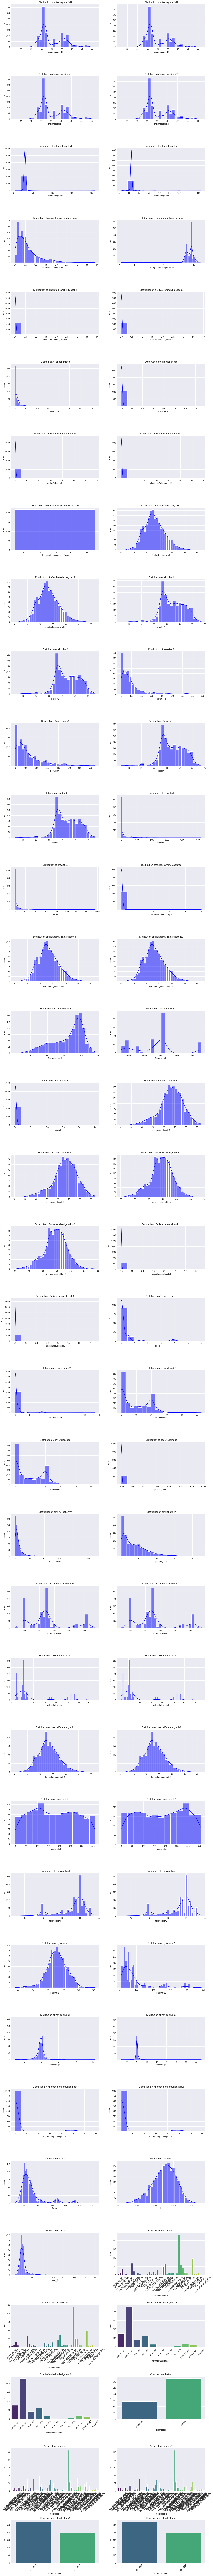

In [20]:
plot_feature_distributions(data_test)

- **Checking outliers**

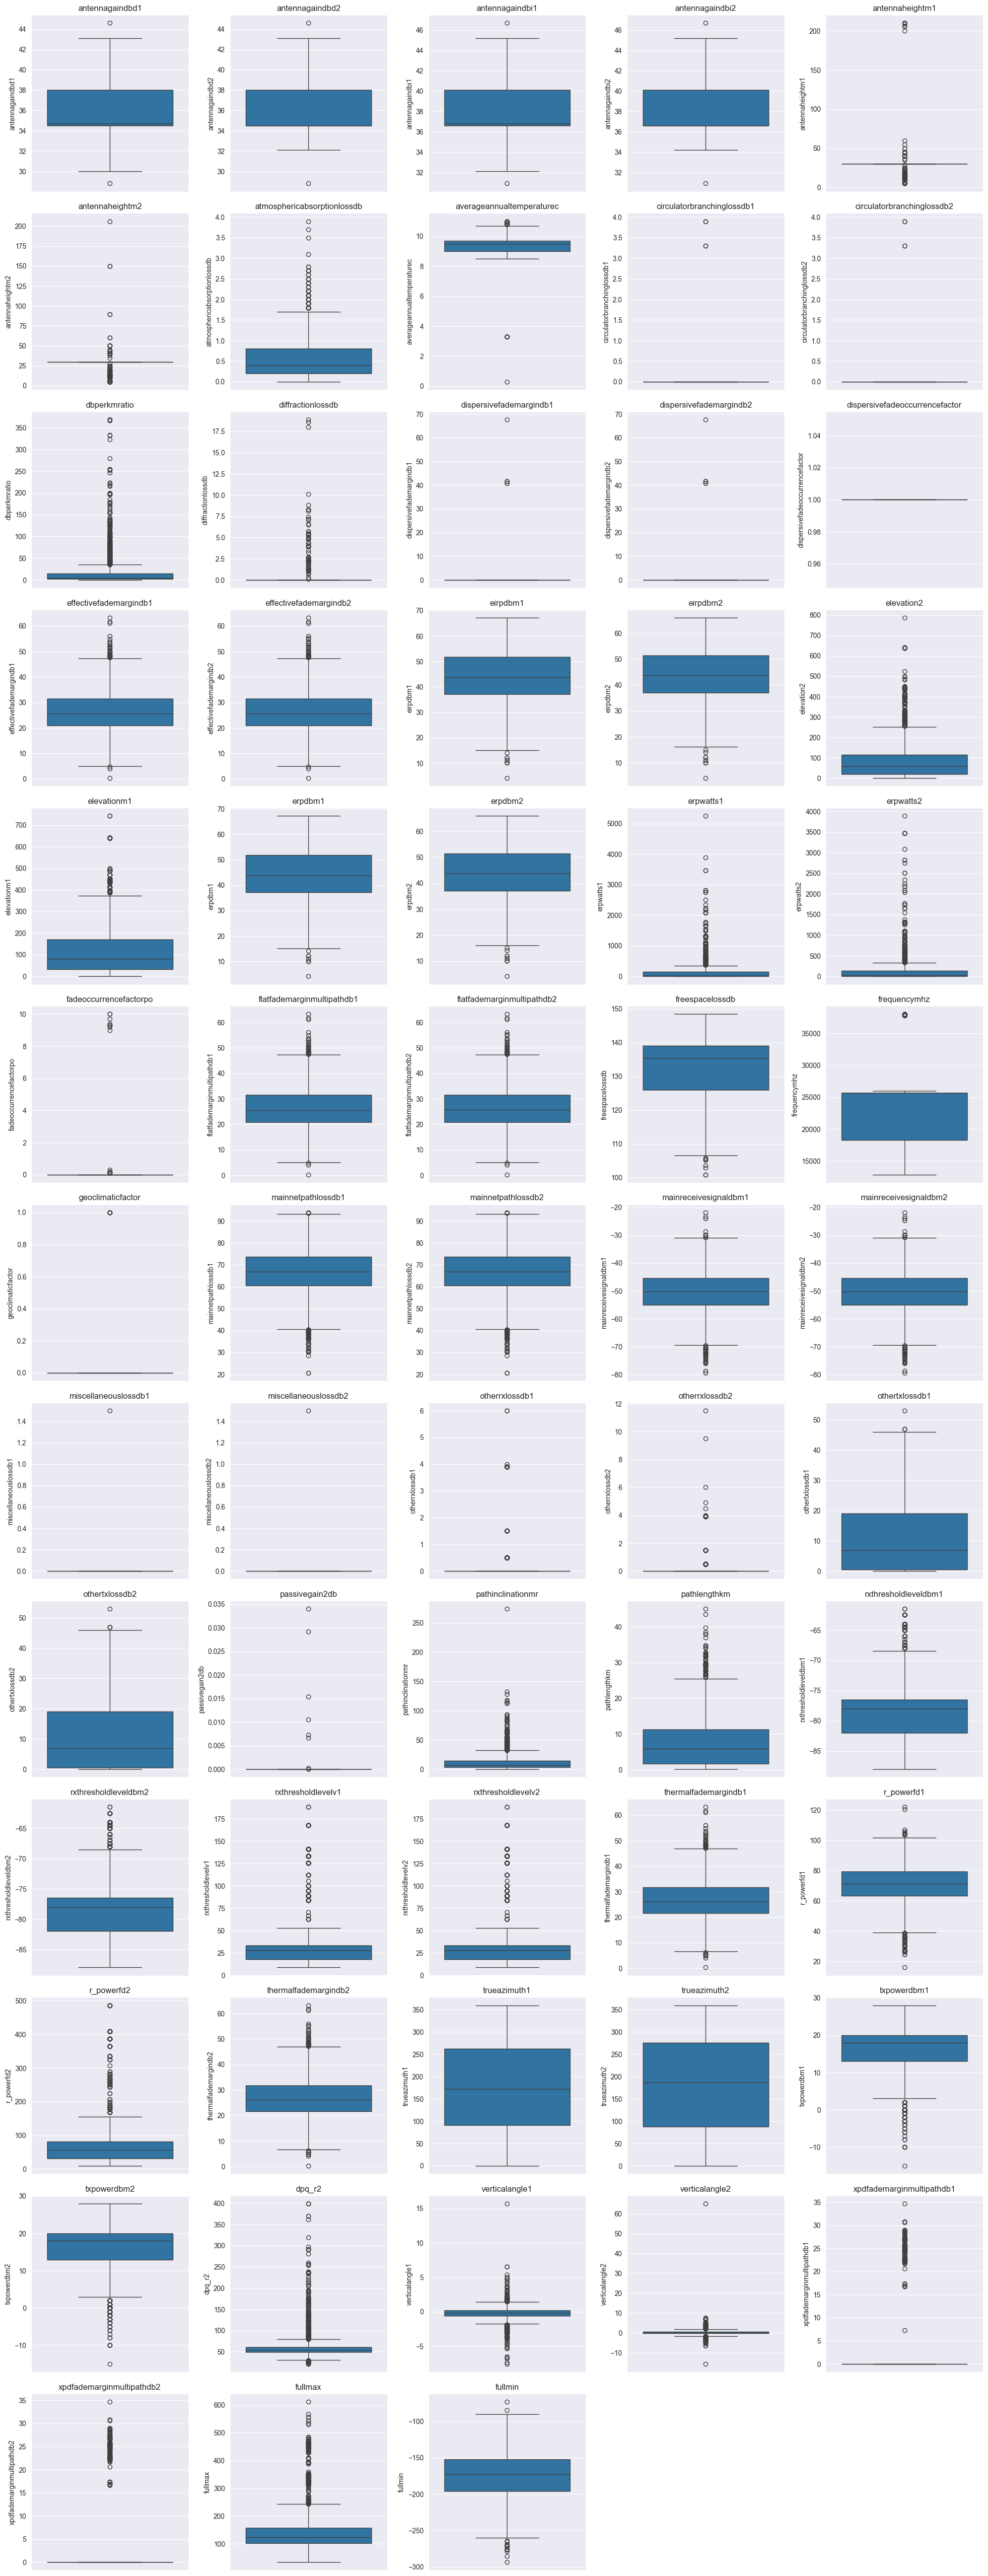

In [21]:


def boxplots_for_outliers(dataset): 
    # boxplots for all numerical features
    numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns
    num_features = len(numerical_features)
    num_rows = ceil(num_features / 5)  # Getting the the number of rows needed
    
    plt.figure(figsize=(20, num_rows * 4))  # setting figure size  based on the number of rows

    # Loop through each numerical feature to create a boxplot for each
    for i, col in enumerate(numerical_features, 1):
        # getting the positioning of the subplot based on the total number of features
        plt.subplot(num_rows, 5, i)  #5 columns per row
        # boxplot for the current feature
        sns.boxplot(y=dataset[col])
        # title of the boxplot based on feature
        plt.title(col)
    

    plt.tight_layout()
    plt.show() #show plot



boxplots_for_outliers(data)

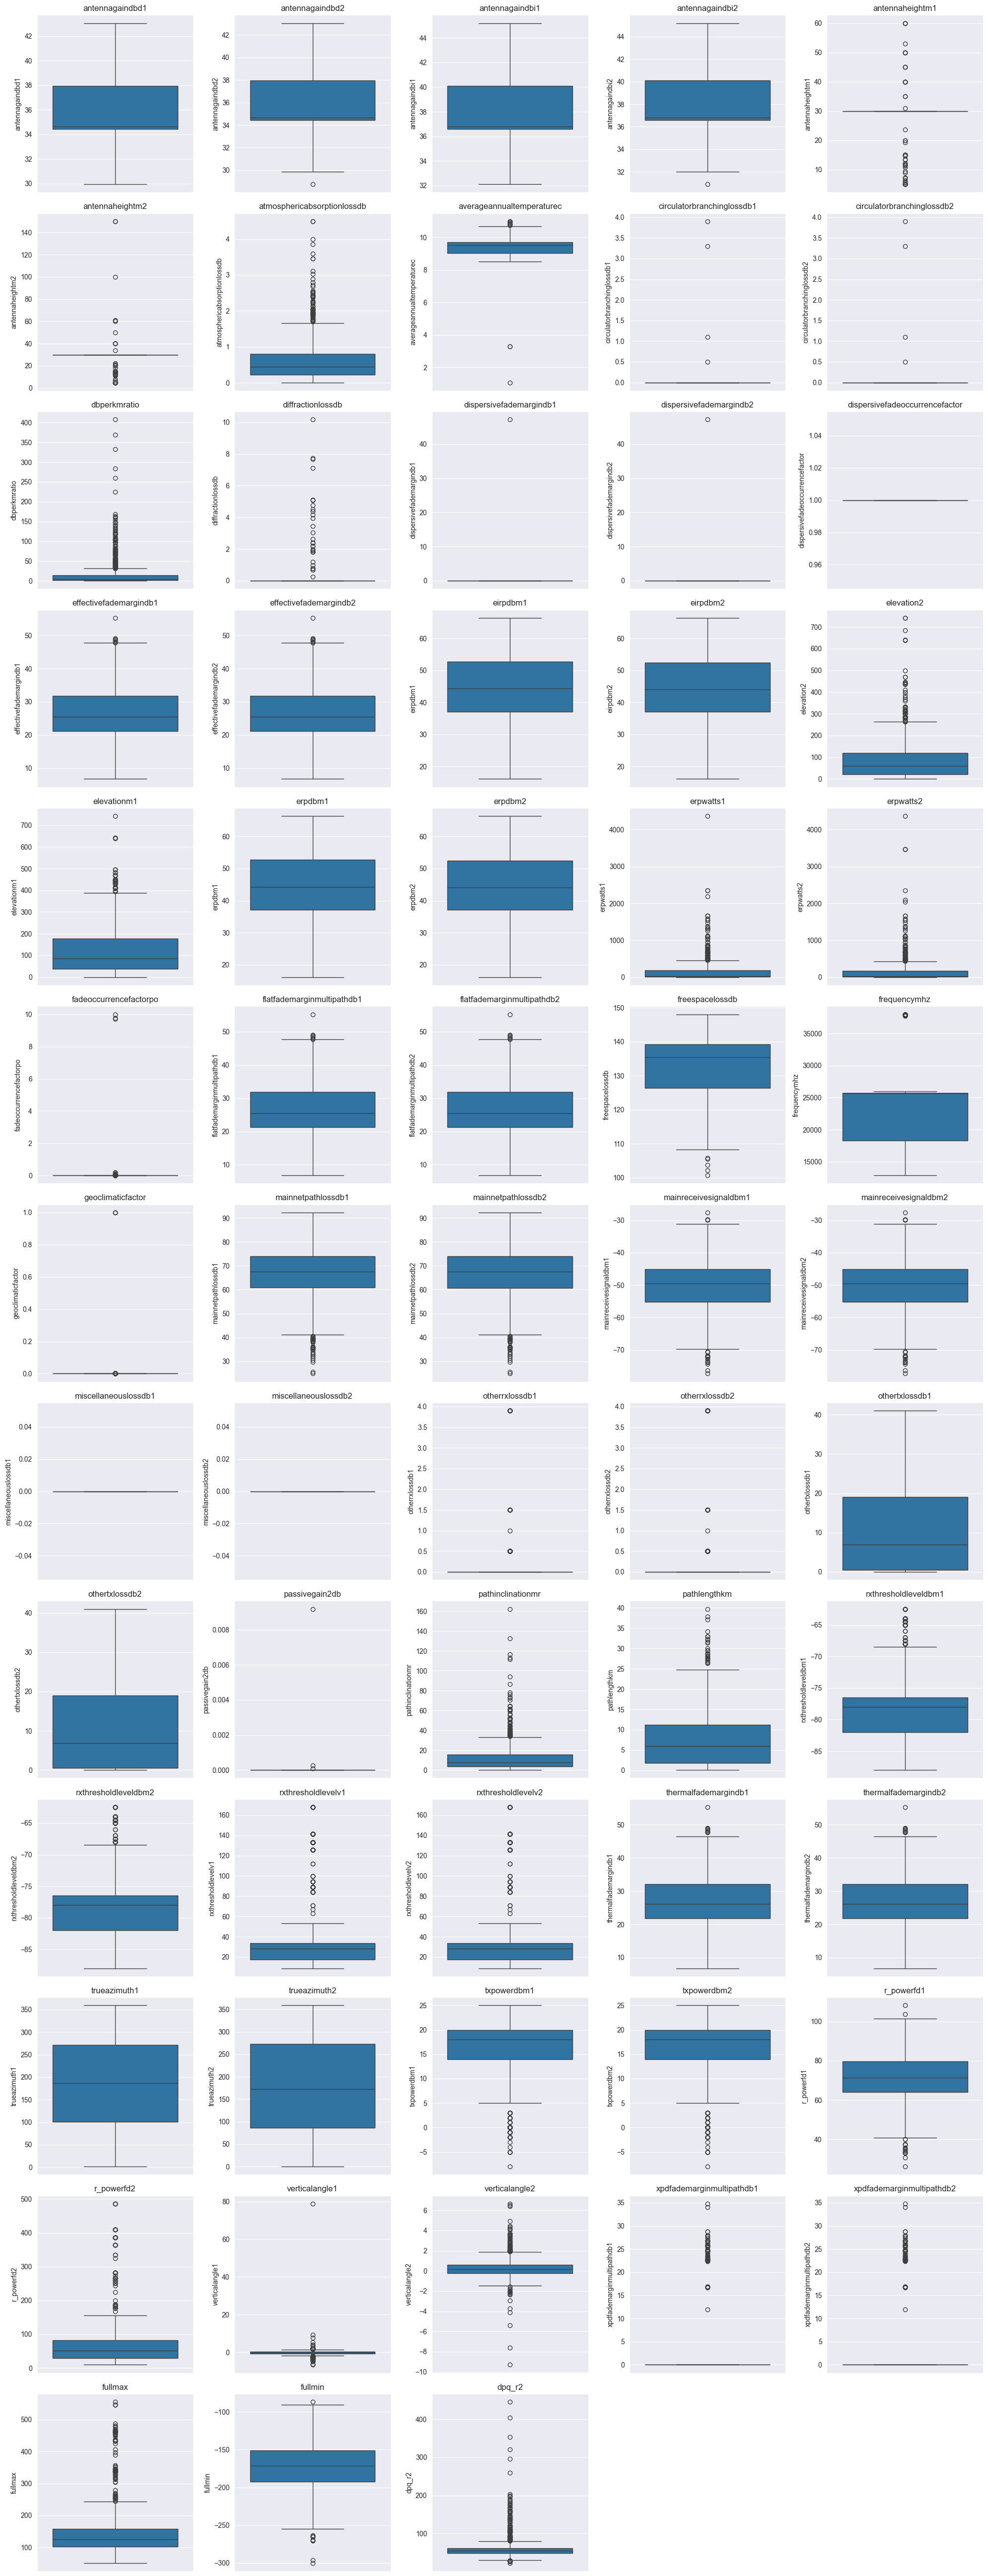

In [22]:
boxplots_for_outliers(data_test)

- **Removing invalid entries in these two columns. Only have to do it on training data as it isnt a problem in test data**

In [23]:
# removing rows where 'rxthresholdcriteria2' has 23
data = data[data['rxthresholdcriteria2'] != 23]

# checking if was fixed
print(data['rxthresholdcriteria2'].unique())

# Remove rows where 'eng_class' has 0
data = data[data['eng_class'] != 0]
# checking if was fixed
print(data['eng_class'].unique())

['1E-6 BER' '1E-3 BER']
['okay' 'under']


- **Mapping the features**

In [24]:
# Manual mapping dictionary
manual_mapping = {'under': 0, 'okay': 1}
#converting eng_class to string data type
data['eng_class'] = data['eng_class'].astype(str)

# Apply manual mapping to the eng_class column
data['eng_class'] = data['eng_class'].map(manual_mapping)

In [25]:

# specific mappings for each column
mapping_rx = {'1E-6 BER': 0, '1E-3 BER': 1}
mapping_polarization = {'Vertical': 0, 'Horizontal': 1}

# Apply the mappings to the columns
data['rxthresholdcriteria1'] = data['rxthresholdcriteria1'].map(mapping_rx)
data['rxthresholdcriteria2'] = data['rxthresholdcriteria2'].map(mapping_rx)
data['polarization'] = data['polarization'].map(mapping_polarization)

# checking the changes
print(data[['rxthresholdcriteria1', 'rxthresholdcriteria2', 'polarization']].head())




   rxthresholdcriteria1  rxthresholdcriteria2  polarization
0                     0                     0             0
1                     1                     1             0
2                     1                     1             1
3                     1                     1             0
4                     1                     1             0


In [26]:
# Apply the mappings to the columns in data_test
data_test['rxthresholdcriteria1'] = data_test['rxthresholdcriteria1'].map(mapping_rx)
data_test['rxthresholdcriteria2'] = data_test['rxthresholdcriteria2'].map(mapping_rx)
data_test['polarization'] = data_test['polarization'].map(mapping_polarization)

# checking the changes in data_test
print(data_test[['rxthresholdcriteria1', 'rxthresholdcriteria2', 'polarization']].head())

   rxthresholdcriteria1  rxthresholdcriteria2  polarization
0                     0                     0             1
1                     0                     0             0
2                     1                     1             0
3                     1                     1             0
4                     1                     1             0


In [27]:
# Columns to be one-hot encoded
columns_to_encode = ['antennamodel1', 'antennamodel2','emissiondesignator1', 'emissiondesignator2',  'radiomodel1', 'radiomodel2']
#One-hot encode selected columns
data = pd.concat([data, pd.get_dummies(data[columns_to_encode])], axis=1)
# Drop original columns after encoding
data.drop(columns_to_encode, axis=1, inplace=True)
print(data.shape)

(2169, 492)


In [28]:
# Now the same as last block of code just for scoring dataset
data_test = pd.concat([data_test, pd.get_dummies(data_test[columns_to_encode])], axis=1)
data_test.drop(columns_to_encode, axis=1, inplace=True)
print(data_test.shape)

(935, 429)


- **Looking at Correlations but there is to many features**

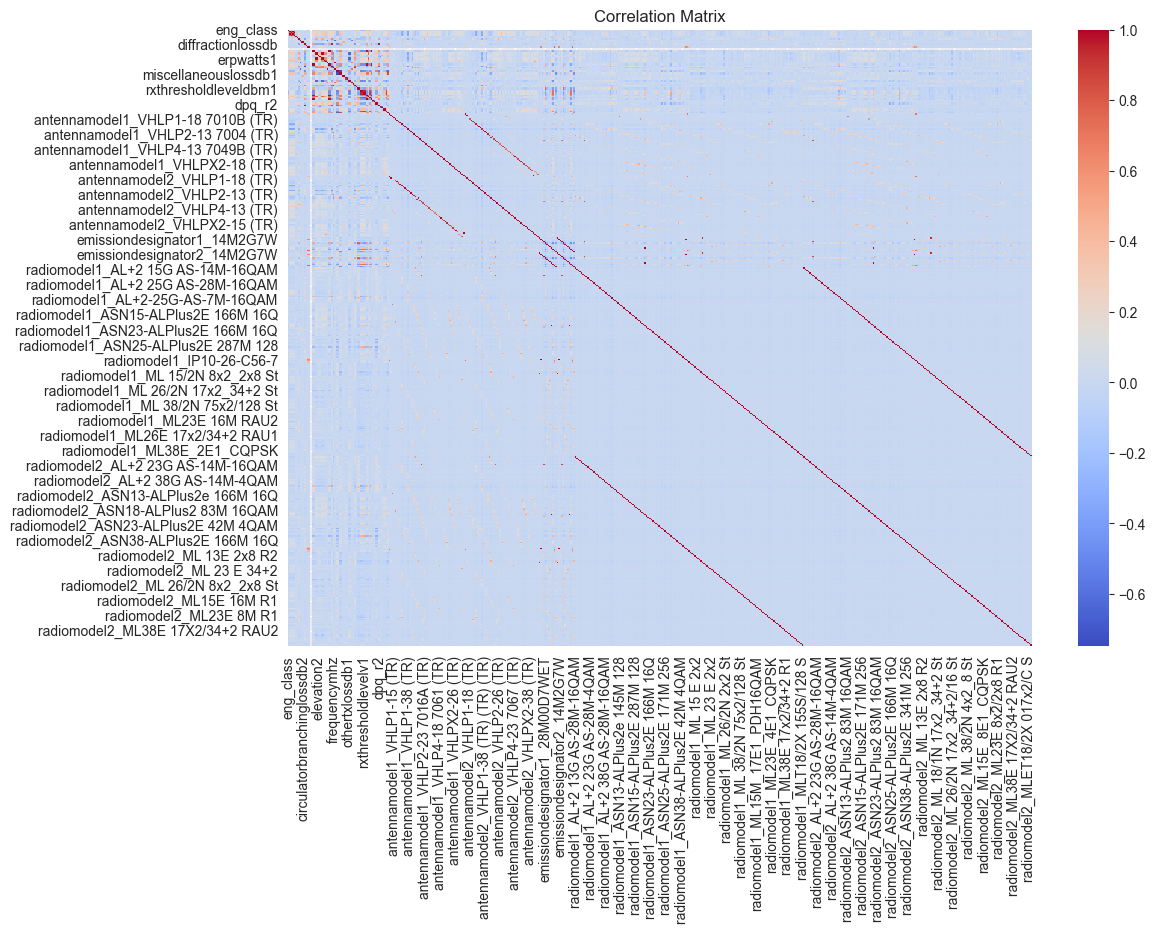

In [29]:
corr_matrix = data.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8)) #figure size
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')  # Plot heatmap
plt.title('Correlation Matrix') #title of the plot
plt.show()


- **Applying near zero variance to get rid of features**

In [30]:
# to calculate near zero variance
def near_zero_variance(data, freq_cut=95/5, unique_cut=10):
    nzv = []  # list to store near-zero variance columns
    for column in data.columns:
        counts = data[column].value_counts()  # Count of each value in the column
        most_common_freq = counts.iloc[0]  # frequency of the most common value
        second_most_common_freq = counts.iloc[1] if len(counts) > 1 else 0  # frequency for the second most common value
        # Frequency ratio cut-off
        freq_ratio = most_common_freq / second_most_common_freq if second_most_common_freq != 0 else np.inf
        # Unique percentage cut-off
        unique_percentage = (data[column].nunique() / len(data)) * 100  # Calculate unique percentage
        if (freq_ratio > freq_cut) and (unique_percentage < unique_cut):
            nzv.append(column)  # Add column to near-zero variance list if conditions met
    return nzv  # Return near-zero variance columns

# Applying function to identify near-zero variance predictors in dataset
nzv_columns = near_zero_variance(data)

# SHow near-zero variance predictors
print("Near Zero Variance Columns:", nzv_columns)

# Remove the NZV columns 
filtered_data = data.drop(columns=nzv_columns)

# Checking shape before and after
print("Original Dimensions:", data.shape)
print("Filtered Dimensions:", filtered_data.shape)


Near Zero Variance Columns: ['antennaheightm1', 'antennaheightm2', 'circulatorbranchinglossdb1', 'circulatorbranchinglossdb2', 'diffractionlossdb', 'dispersivefademargindb1', 'dispersivefademargindb2', 'dispersivefadeoccurrencefactor', 'fadeoccurrencefactorpo', 'geoclimaticfactor', 'miscellaneouslossdb1', 'miscellaneouslossdb2', 'passivegain2db', 'xpdfademarginmultipathdb1', 'xpdfademarginmultipathdb2', 'antennamodel1_26G 0.3m Single (TR) (TR)', 'antennamodel1_SC2 - 142B (TR)', 'antennamodel1_VHLP1-13 (TR)', 'antennamodel1_VHLP1-15 (TR)', 'antennamodel1_VHLP1-18 (TR)', 'antennamodel1_VHLP1-18 7010B (TR)', 'antennamodel1_VHLP1-23 (TR)', 'antennamodel1_VHLP1-23 (TR) (TR) (TR)', 'antennamodel1_VHLP1-26 (TR) (TR)', 'antennamodel1_VHLP1-26 (TR) (TR) (TR)', 'antennamodel1_VHLP1-38 (TR)', 'antennamodel1_VHLP1-38 (TR) (TR) (TR)', 'antennamodel1_VHLP2-13 (TR)', 'antennamodel1_VHLP2-13 7004 (TR)', 'antennamodel1_VHLP2-15 (TR)', 'antennamodel1_VHLP2-18 (TR)', 'antennamodel1_VHLP2-18 7012A (TR)', 

In [31]:
# Applying function to identify nzv predictors for the test data
nzv_columns1 = near_zero_variance(data_test)


print("Near Zero Variance Columns:", nzv_columns1)

# Remove the NZV columns
filtered_data_test = data_test.drop(columns=nzv_columns1)

# Checking shape before and after
print("Original Dimensions:", data_test.shape)
print("Filtered Dimensions:", filtered_data_test.shape)


Near Zero Variance Columns: ['antennaheightm1', 'antennaheightm2', 'circulatorbranchinglossdb1', 'circulatorbranchinglossdb2', 'diffractionlossdb', 'dispersivefademargindb1', 'dispersivefademargindb2', 'dispersivefadeoccurrencefactor', 'miscellaneouslossdb1', 'miscellaneouslossdb2', 'passivegain2db', 'xpdfademarginmultipathdb1', 'xpdfademarginmultipathdb2', 'antennamodel1_SC 2 - 127B (TR)', 'antennamodel1_SC2 - 142B (TR)', 'antennamodel1_THP 03-245 S (TR)', 'antennamodel1_VHLP-1-15 7006A (TR)', 'antennamodel1_VHLP1-18 7010B (TR)', 'antennamodel1_VHLP1-23 (TR)', 'antennamodel1_VHLP1-26 (TR)', 'antennamodel1_VHLP1-26 (TR) (TR) (TR)', 'antennamodel1_VHLP1-28 (TR)', 'antennamodel1_VHLP1-38 (TR)', 'antennamodel1_VHLP1-38 (TR) (TR) (TR)', 'antennamodel1_VHLP2-13 (TR)', 'antennamodel1_VHLP2-13 7004 (TR)', 'antennamodel1_VHLP2-15 (TR)', 'antennamodel1_VHLP2-18 (TR)', 'antennamodel1_VHLP2-18 7012A (TR)', 'antennamodel1_VHLP2-23 (TR)', 'antennamodel1_VHLP2-26 (TR)', 'antennamodel1_VHLP2-38 (TR)'

- **Plotting correlations after Near Zero Variance**

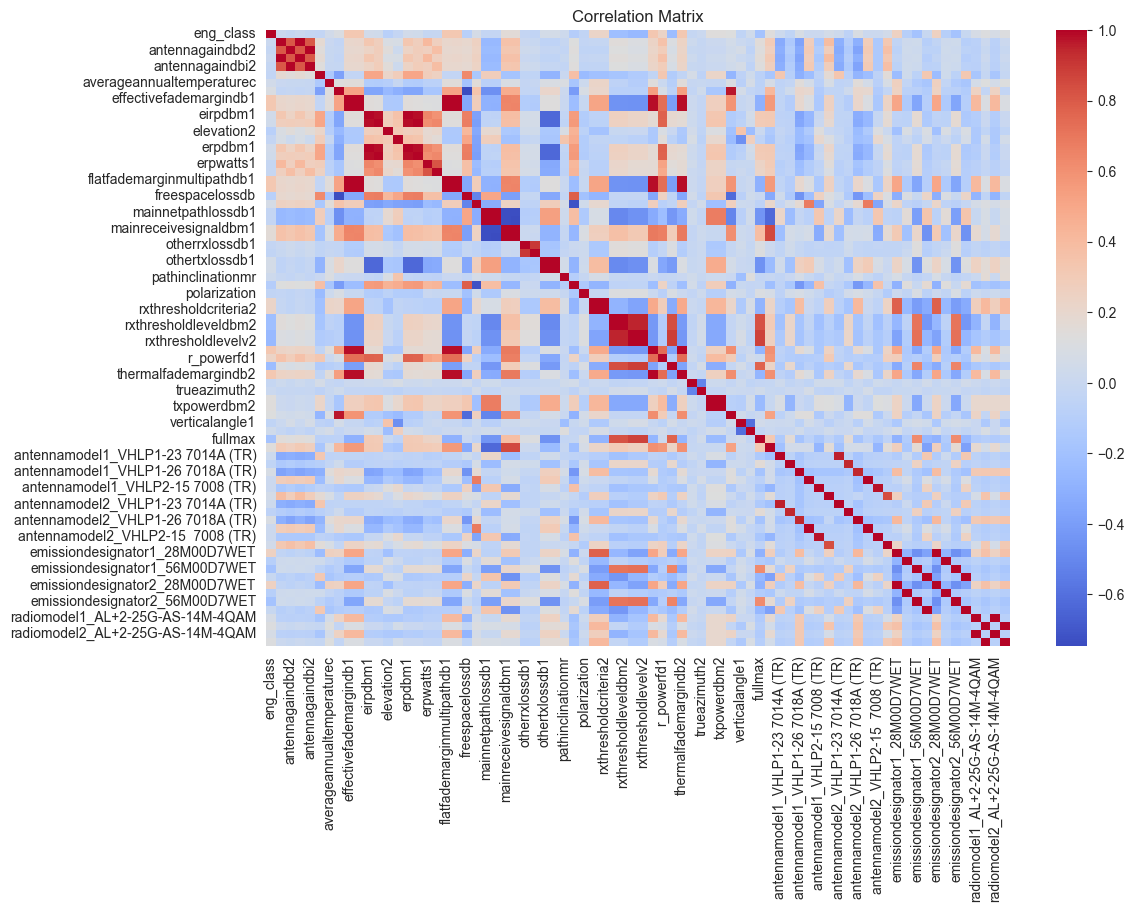

In [32]:
corr_matrix = filtered_data.corr()

# Plot the correlation matrix

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()


- **Identifying Highly Correlated features and one feature was retained from each correlated pair to mitigate multicollinearity issues**

In [33]:

def find_highly_correlated_features(corr_matrix, threshold=0.85):
    highly_correlated = set()  #  set to store highly correlated features
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                highly_correlated.add(corr_matrix.columns[j])  # Add highly correlated feature to set
    return list(highly_correlated)  # make set a list 

# identify highly correlated features
high_corr_features_filtered = find_highly_correlated_features(corr_matrix, threshold=0.85)

# Remove the highly correlated features 
filtered_data_reduced = filtered_data.drop(columns=high_corr_features_filtered)


In [34]:
print(f"Filtered Data Original Dimensions: {filtered_data.shape}")

print(f"Filtered Data Reduced Dimensions: {filtered_data_reduced.shape}")

Filtered Data Original Dimensions: (2169, 76)
Filtered Data Reduced Dimensions: (2169, 42)


- **Now looking at Correlation PLot there is not high correlations left in the training dataset**

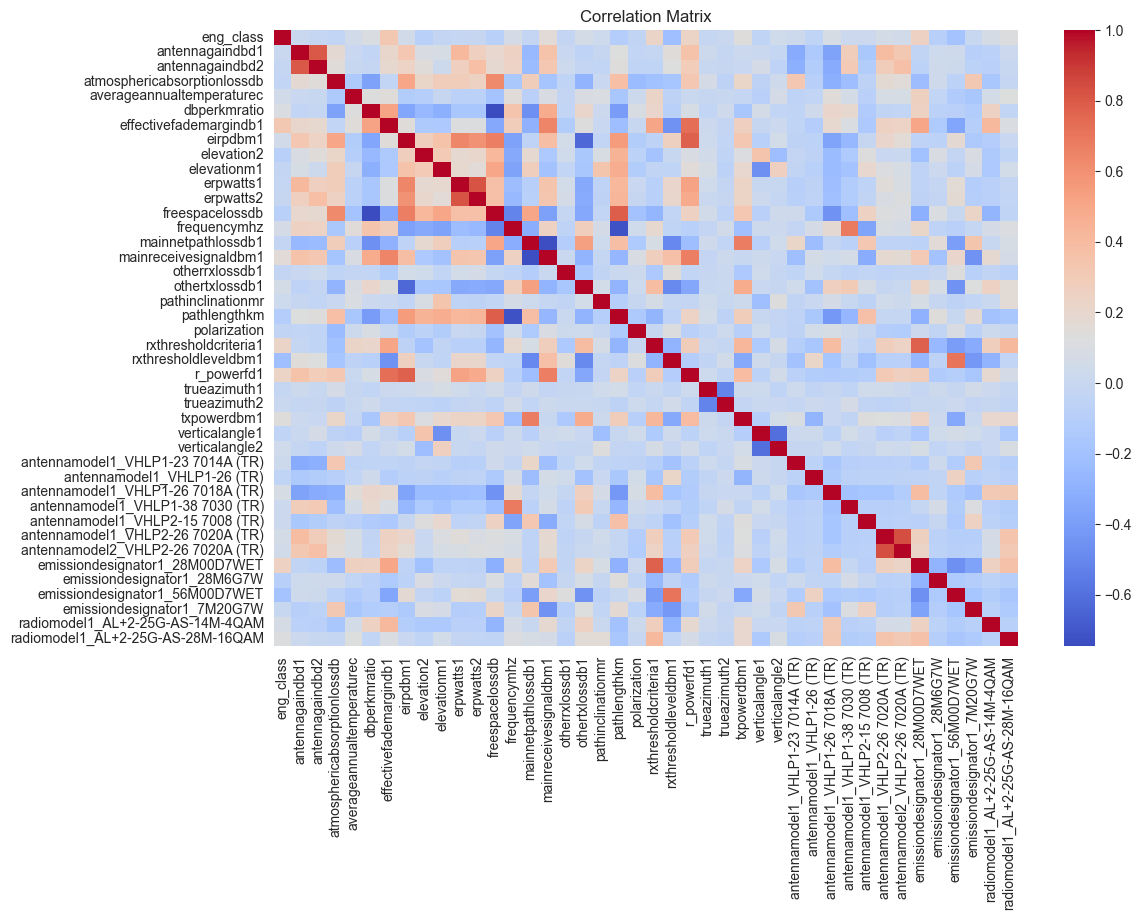

In [35]:
corr_matrix = filtered_data_reduced.corr()

# Plot the correlation matrix

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

- **Time to do the same with the scoring dataset**

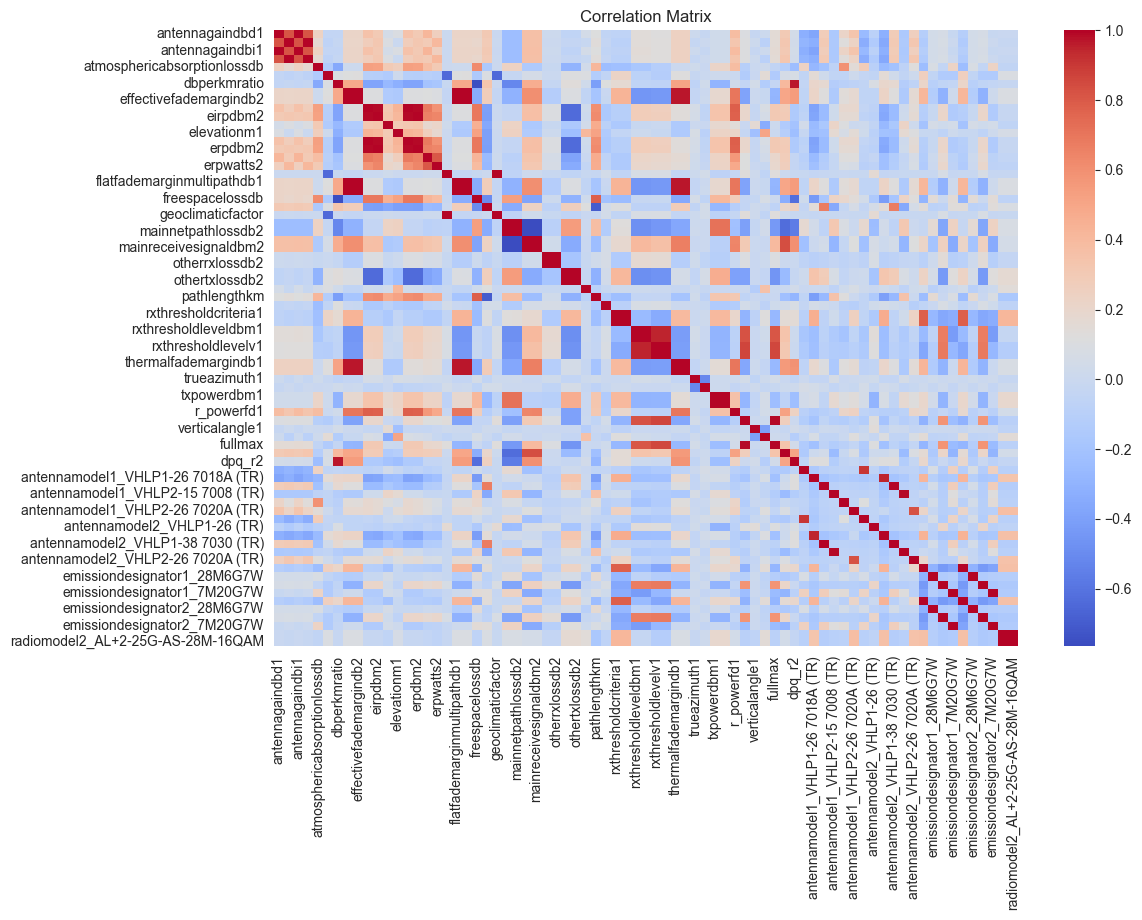

In [36]:
corr_matrix1 = filtered_data_test.corr()

# Plot the correlation matrix

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix1, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()


In [37]:
high_corr_features_filtered1 = find_highly_correlated_features(corr_matrix1, threshold=0.85)
# Remove the highly correlated features from the test dataset same as above for the training dataset

filtered_data_reduced_test = filtered_data_test.drop(columns=high_corr_features_filtered1)

In [38]:
print(f"Filtered Data Original Dimensions: {filtered_data_test.shape}")

print(f"Filtered Data Reduced Dimensions: {filtered_data_reduced_test.shape}")

Filtered Data Original Dimensions: (935, 75)
Filtered Data Reduced Dimensions: (935, 43)


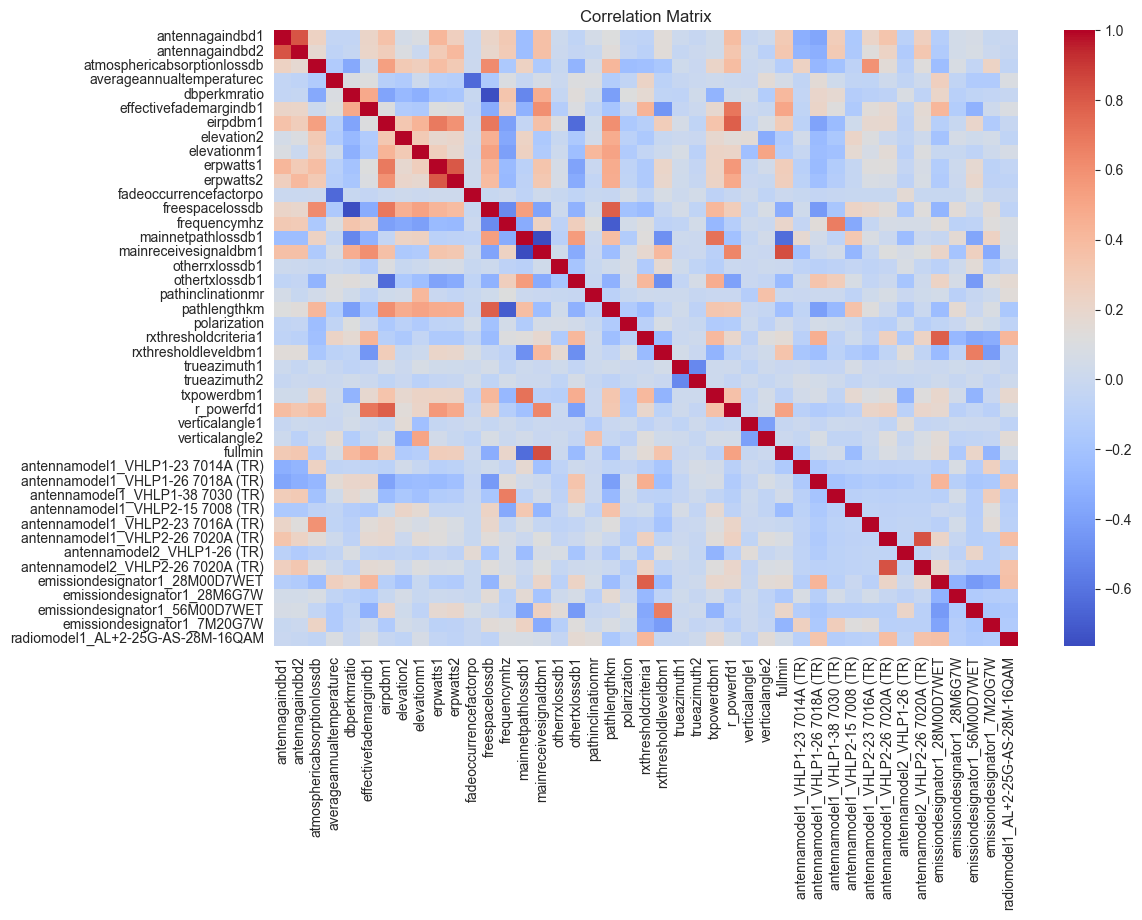

In [39]:
corr_matrix1 = filtered_data_reduced_test.corr()

# Plot the correlation matrix

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix1, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()


- **Identifying difference in columns between datasets**

In [40]:
# Convert column names to sets 
features_reduced_test = set(filtered_data_reduced_test.columns)
features_reduced = set(filtered_data_reduced.columns)

# Find features that are not in common
features_unique_to_reduced_test = features_reduced_test - features_reduced
features_unique_to_reduced = features_reduced - features_reduced_test

# Print the non commmon features
print("Features unique to filtered_data_reduced_test:", features_unique_to_reduced_test)
print("Features unique to filtered_data_reduced:", features_unique_to_reduced)


Features unique to filtered_data_reduced_test: {'fullmin', 'antennamodel2_VHLP1-26 (TR)', 'antennamodel1_VHLP2-23 7016A (TR)', 'fadeoccurrencefactorpo'}
Features unique to filtered_data_reduced: {'antennamodel1_VHLP1-26 (TR)', 'eng_class', 'radiomodel1_AL+2-25G-AS-14M-4QAM'}


- **Removing columns not in common**

In [41]:
# List of columns to remove 
columns_to_remove_test = ['fullmin', 'fadeoccurrencefactorpo', 'antennamodel2_VHLP1-26 (TR)', 'antennamodel1_VHLP2-23 7016A (TR)']

# Drop these columns
filtered_data_reduced_test = filtered_data_reduced_test.drop(columns=columns_to_remove_test)


In [42]:
# List of columns to remove 
columns_to_remove_reduced = ['radiomodel1_AL+2-25G-AS-14M-4QAM', 'antennamodel1_VHLP1-26 (TR)']

# Drop these columns
filtered_data_reduced = filtered_data_reduced.drop(columns=columns_to_remove_reduced)


- **Plotting the distribution of target variable**

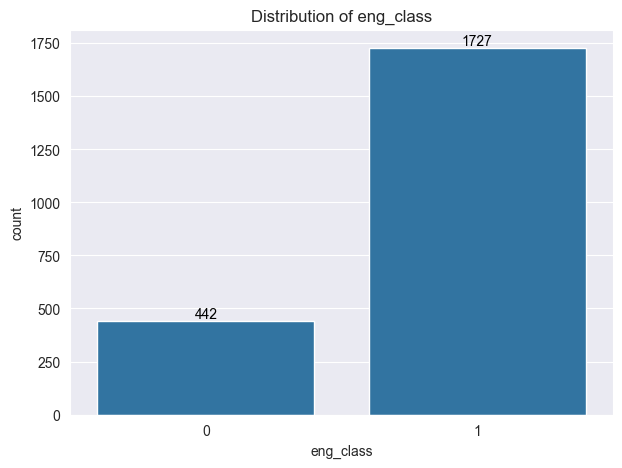

In [43]:
def plot_target_variable(dataset, column_name):
    # Make a copy of the dataset 
    data_temp = dataset.copy()
    data_temp[column_name].astype(str)#convert column to string data type
    # setting the figure size
    plt.figure(figsize=(7, 5))
    # get unique values in the specified column anbd sort them
    order = sorted(data_temp[column_name].unique())
    ax = sns.countplot(x=column_name, data=data_temp, order=order)
    # title of the plot
    plt.title('Distribution of ' + column_name)

    # Annotate bars with heights
    for p in ax.patches:
        # making sure the annotation is an int
        ax.annotate('{}'.format(int(p.get_height())),  
                    # annotation put at the center of each bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', color='black', xytext=(0, 0),
                    textcoords='offset points')
    # show plot
    plt.show()


plot_target_variable(filtered_data_reduced, 'eng_class')

In [44]:
print(filtered_data_reduced.shape)  # Prints the number of rows and columns
print(filtered_data_reduced.dtypes)  # Prints the data types of each column


(2169, 40)
eng_class                              int64
antennagaindbd1                      float64
antennagaindbd2                      float64
atmosphericabsorptionlossdb          float64
averageannualtemperaturec            float64
dbperkmratio                         float64
effectivefademargindb1               float64
eirpdbm1                             float64
elevation2                           float64
elevationm1                          float64
erpwatts1                            float64
erpwatts2                            float64
freespacelossdb                      float64
frequencymhz                         float64
mainnetpathlossdb1                   float64
mainreceivesignaldbm1                float64
otherrxlossdb1                       float64
othertxlossdb1                       float64
pathinclinationmr                    float64
pathlengthkm                         float64
polarization                           int64
rxthresholdcriteria1                   int64

## Splitting the Data

In [45]:
def prepare_data(df, target_column):
    #seperating features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    #split the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    #standardise features using standard scaler
    scaler = StandardScaler()
    
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
   
    
    return X_train_scaled, X_test_scaled, y_train, y_test




In [46]:
#scaling features and splitting into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(filtered_data_reduced, 'eng_class')


# Testing the 3 Models before tuning or addressing the imbalance

- This is to get their baseline metrics. The mdoels being tested are Logistic Regression, Random Forest, and Gradient Boosting

In [47]:

def initial_models(random_state=398):
    # Initialise the models
    clf1 = LogisticRegression(random_state=random_state)
    clf2 = RandomForestClassifier(random_state=random_state)
    clf3 = GradientBoostingClassifier(random_state=random_state)
    
    # Store models in a dictionary
    MODELS = {
        'LogisticRegression': clf1,
        'RandomForestClassifier': clf2,
        'GradientBoostingClassifier': clf3
    }
    return MODELS



In [48]:
def fit_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test):
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on train and test datasets
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics for both train and test datasets
    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test)
    
    return train_metrics, test_metrics

In [49]:
def calculate_metrics(y_true, y_pred):
    # Calculating various classification metrics
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1 Score': f1_score(y_true, y_pred, average='macro'),
        'Confusion Matrix': confusion_matrix(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Classification Report': classification_report(y_true, y_pred)
    }
    return metrics


In [50]:
def print_metrics(metrics, dataset_type="Train"):
    print(f"\n{dataset_type} Scores:")
    for key, value in metrics.items():
        if key == "Confusion Matrix":
            print(f"{key}:\n{value}\n")  # Print confusion matrix
        elif key == "Classification Report":
            print(f"{key}:\n{value}\n")  # Print classification report
        else:
            print(f"{key}: {value:.4f}")  # Print other metrics to4 decimal places



In [51]:

# Initialise models
MODELS = initial_models(random_state=398)

# Evaluate models
for name, model in tqdm(MODELS.items()):
    train_metrics, test_metrics = fit_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)
    
    print("=" * 60)
    print(f"\033[1;33m{name}\033[0;m :\n")
    print_metrics(train_metrics, "Train")
    print_metrics(test_metrics, "Test")
    print("=" * 60)


  0%|          | 0/3 [00:00<?, ?it/s]

LogisticRegression :


Train Scores:
Accuracy: 0.8383
Precision: 0.7982
Recall: 0.6410
F1 Score: 0.6712
Confusion Matrix:
[[ 102  229]
 [  34 1261]]

Balanced Accuracy: 0.6410
MCC: 0.4100
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.31      0.44       331
           1       0.85      0.97      0.91      1295

    accuracy                           0.84      1626
   macro avg       0.80      0.64      0.67      1626
weighted avg       0.83      0.84      0.81      1626



Test Scores:
Accuracy: 0.8527
Precision: 0.8308
Recall: 0.6731
F1 Score: 0.7098
Confusion Matrix:
[[ 41  70]
 [ 10 422]]

Balanced Accuracy: 0.6731
MCC: 0.4786
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.37      0.51       111
           1       0.86      0.98      0.91       432

    accuracy                           0.85       543
   macro avg       0.83      0.67      0.71       543
weigh

#  Logistic Regression

In [52]:
def calculate_metrics(y_true, y_pred, y_prob=None):
        metrics = {
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, average='macro'),
            'Recall': recall_score(y_true, y_pred, average='macro'),
            'F1 Score': f1_score(y_true, y_pred, average='macro'),
            'Confusion Matrix': confusion_matrix(y_true, y_pred)  
        }
        if y_prob is not None:  # Add ROC-AUC score if probab predictions are there
            metrics['ROC-AUC Score'] = roc_auc_score(y_true, y_prob)
        metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
        metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
        return metrics
 



In [53]:


def tune_and_evaluate(X_train, y_train, X_test, y_test):
    #defining the model with specific paramaters
    model = LogisticRegression(random_state=398, max_iter=500, class_weight='balanced')
    #defining the grid search
    param_grid = {
        'C': [0.01, 0.1, 1, 10],  # Regularisation strengths
        'solver': ['liblinear', 'saga'],  # Solvers 
        'penalty': ['l1', 'l2']  # Regularisation types
    }
    # Perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    #getting best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on both training and test data
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    y_prob_test = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


    #calculating metrics
    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test, y_prob_test)

    #print results
    print("Best Parameters:", grid_search.best_params_)
    print("\nTraining Metrics:")
    for metric, value in train_metrics.items():
        if metric != 'Confusion Matrix':
            print(f"{metric}: {value:.4f}")
    print("Training Confusion Matrix:\n", train_metrics['Confusion Matrix'])

    print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))

    print("\nTest Metrics:")
    for metric, value in test_metrics.items():
        if metric != 'Confusion Matrix':
            print(f"{metric}: {value:.4f}")
    print("Test Confusion Matrix:\n", test_metrics['Confusion Matrix'])

    print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))

    return best_model


In [54]:
best_model = tune_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

Training Metrics:
Accuracy: 0.7005
Precision: 0.6325
Recall: 0.6905
F1 Score: 0.6340
Balanced Accuracy: 0.6905
MCC: 0.3177
Training Confusion Matrix:
 [[223 108]
 [379 916]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.67      0.48       331
           1       0.89      0.71      0.79      1295

    accuracy                           0.70      1626
   macro avg       0.63      0.69      0.63      1626
weighted avg       0.79      0.70      0.73      1626


Test Metrics:
Accuracy: 0.7072
Precision: 0.6407
Recall: 0.7022
F1 Score: 0.6432
ROC-AUC Score: 0.7556
Balanced Accuracy: 0.7022
MCC: 0.3374
Test Confusion Matrix:
 [[ 77  34]
 [125 307]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.69      0.49       111
           1       0.90      0.71      0.79       432

    accuracy      

# Random Forest

In [55]:


def prepare_training_data(df, target_column):
    # Separating features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Standardise features using Standard Scaler
    scaler = StandardScaler()
    
    # Apply the scaler to the training data and transform the test data with the same scaler
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    # Return the scaled data along with the scaler
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler


###  **Original Model**

In [56]:

def tune_and_evaluate_rf(X_train, y_train, X_test, y_test):
    # Defining the random forest with specific parameters
    model = RandomForestClassifier(random_state=398, class_weight='balanced')

    # Defining the grid search parameters
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [1, 3, 5],
        'min_samples_split': [5, 10, 20, 50]
    }

    # Perform grid search with cv to get the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Predict on training and testing data
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    y_prob_test = best_model.predict_proba(X_test)[:, 1] 

    # Calculate and print metrics
    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test, y_prob_test)

    print("Best Parameters:", grid_search.best_params_)
    print("\nTraining Metrics:")
    for metric, value in train_metrics.items():
        if metric != 'Confusion Matrix': 
            print(f"{metric}: {value:.4f}")
    print("Training Confusion Matrix:\n", train_metrics['Confusion Matrix'])

    print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))

    print("\nTest Metrics:")
    for metric, value in test_metrics.items():
        if metric != 'Confusion Matrix':  # Same for test metrics
            print(f"{metric}: {value:.4f}")
    print("Test Confusion Matrix:\n", test_metrics['Confusion Matrix'])

    print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))

    return best_model


X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_training_data(filtered_data_reduced, 'eng_class')

# Tune the model and evaluate
best_model_rf1 = tune_and_evaluate_rf(X_train_scaled, y_train, X_test_scaled, y_test)


Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}

Training Metrics:
Accuracy: 0.8487
Precision: 0.7668
Recall: 0.7656
F1 Score: 0.7662
Balanced Accuracy: 0.7656
MCC: 0.5324
Training Confusion Matrix:
 [[ 207  124]
 [ 122 1173]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       331
           1       0.90      0.91      0.91      1295

    accuracy                           0.85      1626
   macro avg       0.77      0.77      0.77      1626
weighted avg       0.85      0.85      0.85      1626


Test Metrics:
Accuracy: 0.8361
Precision: 0.7488
Recall: 0.7263
F1 Score: 0.7363
ROC-AUC Score: 0.7956
Balanced Accuracy: 0.7263
MCC: 0.4746
Test Confusion Matrix:
 [[ 60  51]
 [ 38 394]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.54      0.57       111
           1       0.89      0.91      0.90       43

###  **Feature Selection Model**

In [57]:


def tune_and_evaluate_rf_with_feature_selection(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=398, class_weight='balanced')
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [1, 3, 5],
        'min_samples_split': [5, 10, 20, 50]
    }

    # Setup the grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    
    # Feature selection based on importance
    selector = SelectFromModel(best_model, prefit=True)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Refit model on selected features
    best_model.fit(X_train_selected, y_train)
    y_pred_train = best_model.predict(X_train_selected)
    y_pred_test = best_model.predict(X_test_selected)
    

    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test)

    print("Best Parameters after feature selection:", grid_search.best_params_)  
    print("\nTraining Metrics:")
    for metric, value in train_metrics.items():
        if metric != 'Confusion Matrix': 
            print(f"{metric}: {value:.4f}")
    print("Training Confusion Matrix:\n", train_metrics['Confusion Matrix'])

    print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))

    print("\nTest Metrics:")
    for metric, value in test_metrics.items():
        if metric != 'Confusion Matrix':
            print(f"{metric}: {value:.4f}")
    print("Test Confusion Matrix:\n", test_metrics['Confusion Matrix'])

    print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))

    return best_model 


X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_training_data(filtered_data_reduced, 'eng_class')
# Tune the model and evaluate with feature selection
best_model_rf2 = tune_and_evaluate_rf_with_feature_selection(X_train_scaled, y_train, X_test_scaled, y_test)

Best Parameters after feature selection: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}

Training Metrics:
Accuracy: 0.8462
Precision: 0.7637
Recall: 0.7528
F1 Score: 0.7580
Balanced Accuracy: 0.7528
MCC: 0.5163
Training Confusion Matrix:
 [[ 197  134]
 [ 116 1179]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61       331
           1       0.90      0.91      0.90      1295

    accuracy                           0.85      1626
   macro avg       0.76      0.75      0.76      1626
weighted avg       0.84      0.85      0.84      1626


Test Metrics:
Accuracy: 0.8453
Precision: 0.7647
Recall: 0.7388
F1 Score: 0.7502
Balanced Accuracy: 0.7388
MCC: 0.5028
Test Confusion Matrix:
 [[ 62  49]
 [ 35 397]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60       111
           1       0.89      0.92      0.90       

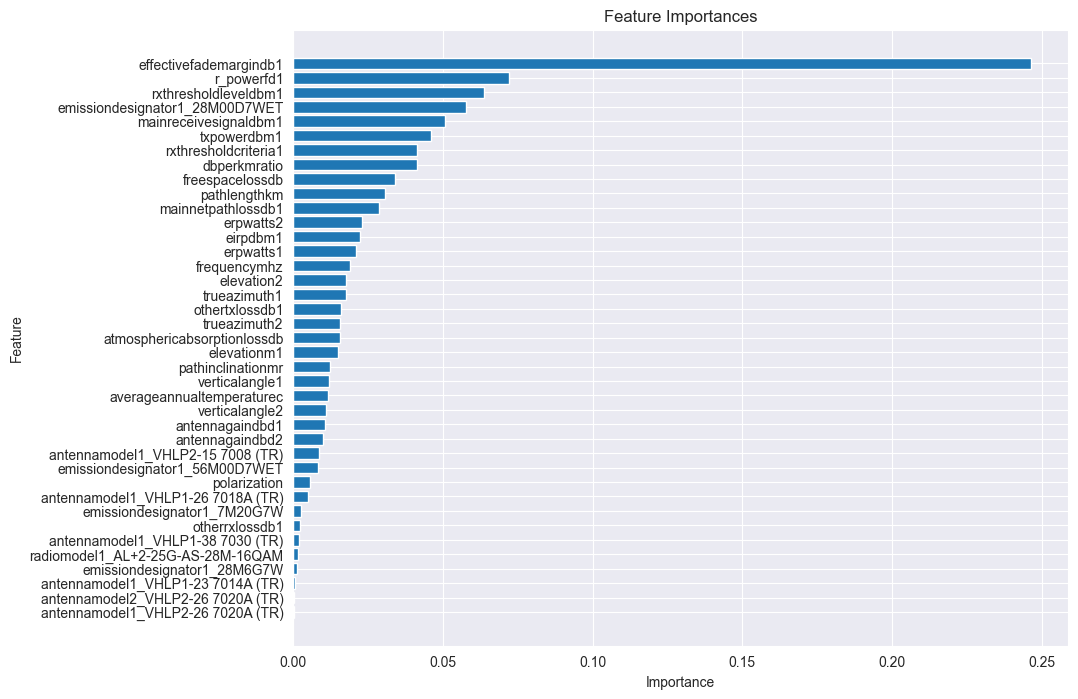

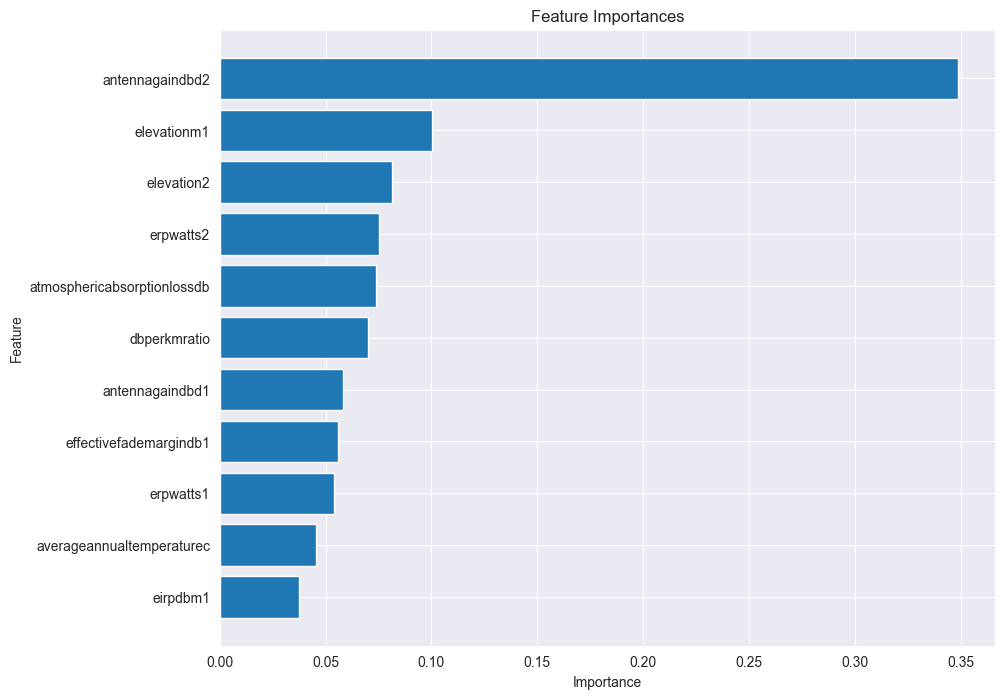

In [58]:

def plot_feature_importance(feature_importances, feature_names):
    # Sort feature importances in ascending order
    sorted_idx = np.argsort(feature_importances)
    # Plot feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()

# Plot feature importance for the first RF model
plot_feature_importance(best_model_rf1.feature_importances_, X_train_scaled.columns)

# Plot feature importance for the second RF model
plot_feature_importance(best_model_rf2.feature_importances_, X_train_scaled.columns)


### **Applying the different class weights model**

In [59]:


def tune_and_evaluate_rf_with_feature_selection(X_train, y_train, X_test, y_test, h):
    # DefinING the class weights 
    class_weights = {0: h, 1: 1}  

    model = RandomForestClassifier(random_state=398, class_weight=class_weights)
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [1, 3, 5],
        'min_samples_split': [5, 10, 20, 50]
    }


    # Setup the grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    
    # Feature selection based on importance
    selector = SelectFromModel(best_model, prefit=True)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Refit model on selected features
    best_model.fit(X_train_selected, y_train)
    y_pred_train = best_model.predict(X_train_selected)
    y_pred_test = best_model.predict(X_test_selected)

    # Calculate and print metrics
    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test)

    # Print classification report
    print(f"Classification Report for h={h}:\n")
    print("Training Data:")
    print(classification_report(y_train, y_pred_train))
    print("\nTest Data:")
    print(classification_report(y_test, y_pred_test))

    print(f"\nBest Parameters for h={h}: {grid_search.best_params_}")
    print(f"\nTraining Metrics for h={h}:")
    print_metrics(train_metrics, "Train")  

    print(f"\nTest Metrics for h={h}:")
    print_metrics(test_metrics, "Test") 

        

    return best_model


X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_training_data(filtered_data_reduced, 'eng_class')


# Tune and evaluate the model with feature selection for different weight classes
hs = [5, 10, 20]
models = {}
for h in hs:
    print(f"\nModel evaluation for h={h}")
    models[h] = tune_and_evaluate_rf_with_feature_selection(X_train_scaled, y_train, X_test_scaled, y_test, h)



Model evaluation for h=5
Classification Report for h=5:

Training Data:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60       331
           1       0.91      0.86      0.88      1295

    accuracy                           0.82      1626
   macro avg       0.73      0.76      0.74      1626
weighted avg       0.83      0.82      0.83      1626


Test Data:
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       111
           1       0.90      0.87      0.88       432

    accuracy                           0.82       543
   macro avg       0.72      0.74      0.73       543
weighted avg       0.82      0.82      0.82       543


Best Parameters for h=5: {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 200}

Training Metrics for h=5:

Train Scores:
Accuracy: 0.8210
Precision: 0.7291
Recall: 0.7595
F1 Score: 0.7417
Confusion Matrix:
[[ 217  114]
 [ 177 1118]]

Balanced Accuracy

###  **Using the Best RFC to predict using the scoring data**

In [60]:
def scale_test_data(test_df, scaler, feature_columns):
    # Scale the test data
    X_test_scaled = pd.DataFrame(scaler.transform(test_df[feature_columns]), columns=feature_columns)
    return X_test_scaled


features_selected = X_train_scaled.columns.tolist()  # use the same features as those used in training
# Scale thetest data using the same scaler and selected features
X_test_new_scaled = scale_test_data(filtered_data_reduced_test, scaler, features_selected)


In [61]:
# Features used in feature selection RF Model(Best Model)
features_selected = ['antennagaindbd2', 'elevationm1', 'elevation2', 'erpwatts2', 'atmosphericabsorptionlossdb', 'dbperkmratio', 'antennagaindbd1', 'effectivefademargindb1', 'erpwatts1', 'averageannualtemperaturec', 'eirpdbm1']

# Select these features from the scaled test data
X_test_selected = X_test_new_scaled[features_selected]


In [62]:
# Make predictions on the test data using the  best model
y_test_predictions = best_model_rf2.predict(X_test_selected)

# the prediction probabilities
y_test_probabilities = best_model_rf2.predict_proba(X_test_selected)[:, 1]  # Assuming a binary classification; adjust as necessary

# Add predictions to the df
filtered_data_reduced_test['predicted_class'] = y_test_predictions


In [63]:
print(y_test_predictions)


[1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 

In [64]:
# Count the freq of each class in y_test_predictions
counts = np.bincount(y_test_predictions)

# Display the counts
print("Count of 0s:", counts[0])
print("Count of 1s:", counts[1])


Count of 0s: 101
Count of 1s: 834


In [65]:
print(y_test_probabilities)


[0.63020522 0.45907675 0.63225268 0.4268012  0.57537169 0.62356523
 0.6861821  0.64092283 0.54436986 0.7108348  0.57221709 0.54461095
 0.62134052 0.60656899 0.62193636 0.45826995 0.45767465 0.6278173
 0.60697891 0.60670356 0.61831106 0.57369596 0.66981715 0.63255342
 0.62057015 0.63821585 0.60643546 0.64145575 0.65774798 0.45992531
 0.56839224 0.63431415 0.57138965 0.67331555 0.606349   0.62342621
 0.54880214 0.54971957 0.66032125 0.62006806 0.67142409 0.66008083
 0.55830746 0.59243507 0.55732784 0.57340179 0.54992873 0.57929857
 0.68923738 0.6121828  0.66729422 0.51760996 0.42839034 0.56925024
 0.59867075 0.52461108 0.56621256 0.56883698 0.57144056 0.56304659
 0.59548694 0.62333925 0.64715347 0.58667978 0.7214241  0.58840556
 0.4385738  0.63024994 0.4660615  0.62500533 0.44309151 0.56146665
 0.66627354 0.60328289 0.40664676 0.72216626 0.61386742 0.59295903
 0.69855847 0.66028866 0.54113124 0.41606832 0.58723609 0.44515387
 0.6112732  0.53836837 0.59088593 0.39488858 0.42049042 0.65205

# GBC

In [66]:
# Apply SMOTE to the training data
def apply_smote(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

###  Original Model

In [67]:

def tune_and_evaluate_gbc(X_train, y_train, X_test, y_test):
    gbc = GradientBoostingClassifier(random_state=398)
     # Define the grid of hyperparameters to search
    param_grid = {
        'n_estimators': [100, 200, 300],  # Number of boosting stages
        'learning_rate': [0.1],  # Learning rate
        'max_depth': [1, 2],  # Max depth of the  trees
        'min_samples_split': [50, 10, 30],  # Min no. of samples required to split 
        'min_samples_leaf': [5, 10, 30]  # Min no. of samples required to be at a leaf node
    }
    # Perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(gbc, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Evaluate the model
    y_pred_train = best_model.predict(X_train)
    y_prob_train = best_model.predict_proba(X_train)[:, 1]
    y_pred_test = best_model.predict(X_test)
    y_prob_test = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics for training and test data
    train_metrics = calculate_metrics(y_train, y_pred_train, y_prob_train)
    test_metrics = calculate_metrics(y_test, y_pred_test, y_prob_test)
    
    print("Best Parameters:", grid_search.best_params_)
    print("\nTraining Metrics:")
    for metric, value in train_metrics.items():
        if metric != 'Confusion Matrix':
            print(f"{metric}: {value:.4f}")
    print("Training Confusion Matrix:\n", train_metrics['Confusion Matrix'])
    print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))

    print("\nTest Metrics:")
    for metric, value in test_metrics.items():
        if metric != 'Confusion Matrix':
            print(f"{metric}: {value:.4f}")
    print("Test Confusion Matrix:\n", test_metrics['Confusion Matrix'])
    print("\nTest Classification Report:\n", classification_report(y_test, y_pred_test))

    return best_model


# Prepare the training data
X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(filtered_data_reduced, 'eng_class')
# Apply SMOTE to balance the training data
X_train_smote, y_train_smote = apply_smote(X_train_scaled, y_train)
# Tune and evaluate the Gradient Boosting Classifier
best_model = tune_and_evaluate_gbc(X_train_smote, y_train_smote, X_test_scaled, y_test)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 30, 'min_samples_split': 50, 'n_estimators': 300}

Training Metrics:
Accuracy: 0.9100
Precision: 0.9130
Recall: 0.9100
F1 Score: 0.9099
ROC-AUC Score: 0.9689
Balanced Accuracy: 0.9100
MCC: 0.8230
Training Confusion Matrix:
 [[1124  171]
 [  62 1233]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      1295
           1       0.88      0.95      0.91      1295

    accuracy                           0.91      2590
   macro avg       0.91      0.91      0.91      2590
weighted avg       0.91      0.91      0.91      2590


Test Metrics:
Accuracy: 0.8564
Precision: 0.7876
Recall: 0.7424
F1 Score: 0.7610
ROC-AUC Score: 0.8023
Balanced Accuracy: 0.7424
MCC: 0.5281
Test Confusion Matrix:
 [[ 61  50]
 [ 28 404]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.55     

### Feature Selection Mode

In [68]:


def apply_rfe_and_retrain(X_train, y_train, X_test, y_test, model):
    # Initialize RFE with the model and number of features to select
    rfe = RFE(model, n_features_to_select=10) 
    rfe.fit(X_train, y_train)
    
    # Get the mask of the selected features
    selected_features = X_train.columns[rfe.support_]


    X_train_rfe = X_train[selected_features]
    X_test_rfe = X_test[selected_features]

    # Refit the model on the reduced feature set for the training data
    model.fit(X_train_rfe, y_train)

    # Predictions on training data
    y_train_pred = model.predict(X_train_rfe)
    # Predictions on test data
    y_pred_rfe = model.predict(X_test_rfe)

    # Output the selected features
    print("Selected Features:", selected_features.tolist())

    # Calculate confusion matrices
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_pred_rfe)

    print("\nTraining Confusion Matrix:")
    print(train_conf_matrix)

    print("\nTest Confusion Matrix:")
    print(test_conf_matrix)

    # Calculate metrics 
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_pred_rfe)

    # Print metrics for training data
    print("\nTraining Metrics with RFE:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")

    # Print metrics for test data
    print("\nTest Metrics with RFE:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")

    return model

# Apply RFE and retrain the model
best_model_with_rfe = apply_rfe_and_retrain(X_train_smote, y_train_smote, X_test_scaled, y_test, best_model)


Selected Features: ['antennagaindbd2', 'atmosphericabsorptionlossdb', 'averageannualtemperaturec', 'effectivefademargindb1', 'freespacelossdb', 'frequencymhz', 'polarization', 'rxthresholdleveldbm1', 'verticalangle2', 'emissiondesignator1_28M00D7WET']

Training Confusion Matrix:
[[1100  195]
 [  47 1248]]

Test Confusion Matrix:
[[ 56  55]
 [ 18 414]]

Training Metrics with RFE:
Accuracy: 0.9065637065637066
Precision: 0.911944202266783
Recall: 0.9065637065637066
F1 Score: 0.9062576089603116
Confusion Matrix: [[1100  195]
 [  47 1248]]
Balanced Accuracy: 0.9065637065637066
MCC: 0.8184902241835574

Test Metrics with RFE:
Accuracy: 0.8655616942909761
Precision: 0.8197429839220884
Recall: 0.7314189189189189
F1 Score: 0.7621921588625251
Confusion Matrix: [[ 56  55]
 [ 18 414]]
Balanced Accuracy: 0.7314189189189189
MCC: 0.5440388797545961


### Applying the different class weights model

In [69]:


def retrain_with_costs(X_train, y_train, X_test, y_test, model, h):
    # sample weights for misclassification cost
    weights = compute_sample_weight(class_weight={0: h, 1: 1}, y=y_train)
    
    # Refit the model on the training data with adjusted weights
    model.fit(X_train, y_train, sample_weight=weights)
    
    # Predictions on training data
    y_train_pred = model.predict(X_train)
    # Predictions on test data
    y_pred = model.predict(X_test)
    
    # Display accuracy and classification report for training and test data
    print(f"Training Accuracy with cost ratio h={h}:", accuracy_score(y_train, y_train_pred))
    print(f"Training Classification Report with cost ratio h={h}:\n", classification_report(y_train, y_train_pred))
    print(f"Test Accuracy with cost ratio h={h}:", accuracy_score(y_test, y_pred))
    print(f"Test Classification Report with cost ratio h={h}:\n", classification_report(y_test, y_pred))
    
    return model

#running model with different cost rations
h_values = [5, 10, 20]
models_with_costs = []
for h in h_values:
    print(f"\n--- Running model with cost ratio h={h} ---")
    model_with_costs = retrain_with_costs(X_train_smote, y_train_smote, X_test_scaled, y_test, best_model, h)
    models_with_costs.append(model_with_costs)



--- Running model with cost ratio h=5 ---
Training Accuracy with cost ratio h=5: 0.7868725868725869
Training Classification Report with cost ratio h=5:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      1295
           1       0.99      0.58      0.73      1295

    accuracy                           0.79      2590
   macro avg       0.85      0.79      0.78      2590
weighted avg       0.85      0.79      0.78      2590

Test Accuracy with cost ratio h=5: 0.5966850828729282
Test Classification Report with cost ratio h=5:
               precision    recall  f1-score   support

           0       0.31      0.79      0.45       111
           1       0.91      0.55      0.68       432

    accuracy                           0.60       543
   macro avg       0.61      0.67      0.56       543
weighted avg       0.79      0.60      0.63       543


--- Running model with cost ratio h=10 ---
Training Accuracy with cost ratio h=10: 0.693

# Evaluation

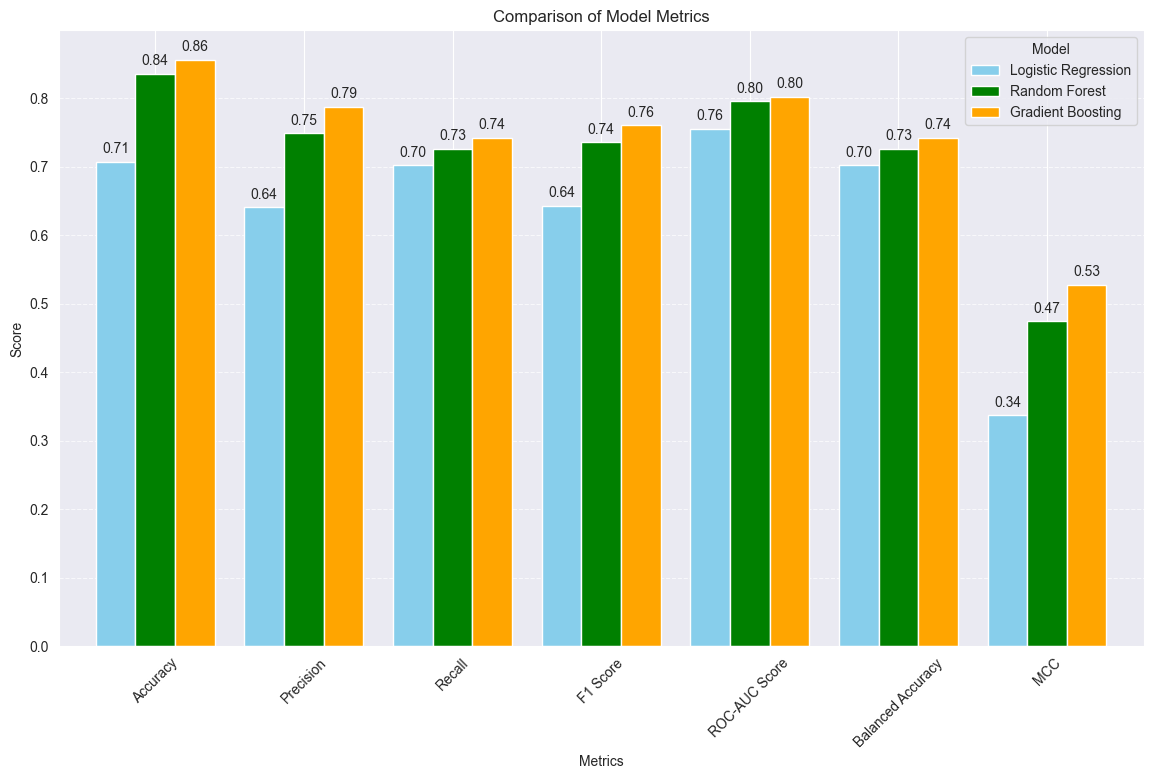

In [70]:

data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score', 'Balanced Accuracy', 'MCC'],
    'Logistic Regression': [0.7072, 0.6407, 0.7022, 0.6432, 0.7556, 0.7022, 0.3374],
    'Random Forest': [0.8361, 0.7488, 0.7263, 0.7363, 0.7956, 0.7263, 0.4746],
    'Gradient Boosting': [0.8564, 0.7876, 0.7424, 0.7610, 0.8023, 0.7424, 0.5281]
}

# making a df
df_metrics = pd.DataFrame(data)

df_metrics.set_index('Metric', inplace=True)

# Plotting
ax = df_metrics.plot(kind='bar', figsize=(14, 8), width=0.8, color=['skyblue', 'green', 'orange'])
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()


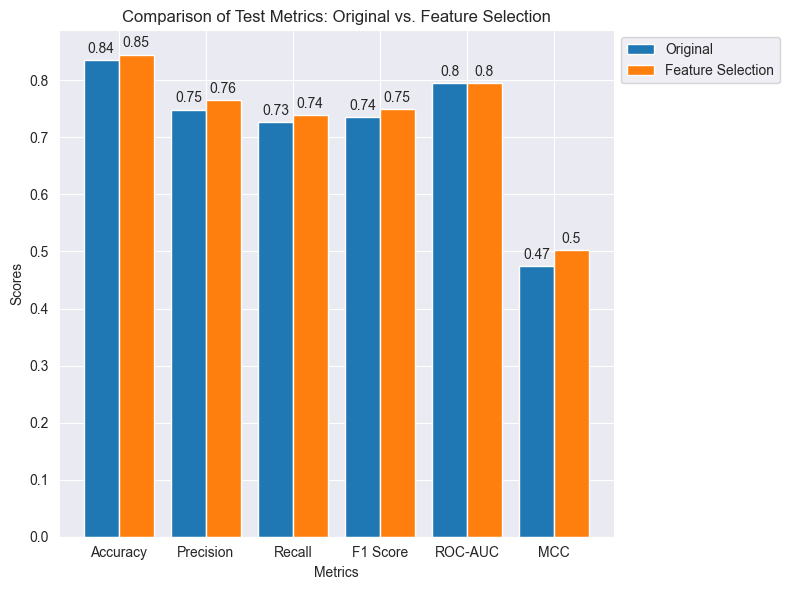

In [71]:


# Metrics from the original and feature selection models on test data
metrics_original = {
    'Accuracy': 0.8361,
    'Precision': 0.7488,
    'Recall': 0.7263,
    'F1 Score': 0.7363,
    'ROC-AUC': 0.7956,
    'MCC': 0.4746
}

metrics_feature_selection = {
    'Accuracy': 0.8453,
    'Precision': 0.7647,
    'Recall': 0.7388,
    'F1 Score': 0.7502,
    'ROC-AUC': 0.7956,  
    'MCC': 0.5028
}

# Create arrays for the plot
labels = list(metrics_original.keys())
original_values = [metrics_original[m] for m in labels]
feature_selection_values = [metrics_feature_selection[m] for m in labels]

x = np.arange(len(labels)) 
width = 0.4  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6)) 
rects1 = ax.bar(x - width/2, original_values, width, label='Original')
rects2 = ax.bar(x + width/2, feature_selection_values, width, label='Feature Selection')


ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Test Metrics: Original vs. Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# Function to add text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
